In [1]:
#Importa√ß√£o das Bubliotecas
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Teste ANOVA
## Vari√°veis Independentes 
- Tempo (Minutos) : Tempo de extra√ß√£o por ultrassom (ou agita√ß√£o)
- Raz√£o S√≥lido-Liquido : Quanto de biomassa foi usada por volume de solvente
- Concentra√ß√£o De Etanol (%) : Propor√ß√£o de etanol no solvente (misturado com √°gua)

## Vari√°veis Dependentes 
- Atividade Antioxidantes ABTS (ug/g) : Medida da capacidade antioxidante da amostra extra√≠da
- Compostos Fen√≥licos (Mg/g) : Quantidade de fen√≥is totais extra√≠dos
- Flavonoides(Mg/g) : Quantidade de flavonoides totais

## Objetivos 
- Tratamento dos Dados
- An√°lise de Dados
- Aplica√ß√£o Estat√≠stica
  

In [3]:
#Abrindo o Dataset e Imprimimdo o dataset
df_anova = pd.read_excel("data_pracaxi.xlsx", sheet_name="Planilha1", header=1)
df_anova.head()

Tempo (minutos) Raz√£o S√≥lido-L√≠quido Concentra√ß√£o de Etanol (%)  \
0              -1                   -1                         -1   
1              -1                   -1                          1   
2              -1                    1                         -1   
3              -1                    1                          1   
4               1                   -1                         -1   

  Atividade Antioxidante ABTS (¬µg/g) Compostos Fen√≥licos (mg/g)  \
0                          62.158665                   0.450351   
1                         110.178652                       0.82   
2                          52.587877                   0.381009   
3                          71.947384                   0.521272   
4                          16.829089                    0.12193   

  Flavonoides (mg/g)  
0           0.018619  
1           0.020559  
2           0.006379  
3           0.016283  
4           0.019457

In [4]:
#Explorando mais Detalhes do Dataset
df_anova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Tempo (minutos)                     25 non-null     object
 1   Raz√£o S√≥lido-L√≠quido                22 non-null     object
 2   Concentra√ß√£o de Etanol (%)          22 non-null     object
 3   Atividade Antioxidante ABTS (¬µg/g)  22 non-null     object
 4   Compostos Fen√≥licos (mg/g)          22 non-null     object
 5   Flavonoides (mg/g)                  22 non-null     object
dtypes: object(6)
memory usage: 1.4+ KB


In [5]:
df_anova

Tempo (minutos) Raz√£o S√≥lido-L√≠quido  \
0                           -1                   -1   
1                           -1                   -1   
2                           -1                    1   
3                           -1                    1   
4                            1                   -1   
5                            1                   -1   
6                            1                    1   
7                            1                    1   
8                        -1.68                    0   
9                         1.68                    0   
10                           0                -1.68   
11                           0                 1.68   
12                           0                    0   
13                           0                    0   
14                           0                    0   
15                           0                    0   
16                           0                    0   
17                         NaN                  NaN   
18     Vari√°veis independentes                  NaN   
19       Vari√°veis dependentes                  NaN   
20         Valores codificados                  NaN   
21                   Vari√°veis    Ponto axial menor   
22                         NaN                -1.68   
23               Valores reais                  NaN   
24             Tempo (minutos)                 0.34   
25        Raz√£o S√≥lido-L√≠quido                  0.1   
26  Concentra√ß√£o de Etanol (%)                 0.01   

   Concentra√ß√£o de Etanol (%) Atividade Antioxidante ABTS (¬µg/g)  \
0                          -1                          62.158665   
1                           1                         110.178652   
2                          -1                          52.587877   
3                           1                          71.947384   
4                          -1                          16.829089   
5                           1                         118.699562   
6                          -1                          15.182502   
7                           1                          28.984777   
8                           0                          12.422047   
9                           0                          70.391601   
10                          0                            5.52091   
11                          0                          14.906457   
12                      -1.68                          14.940297   
13                       1.68                          80.053193   
14                          0                          20.703412   
15                          0                          38.646369   
16                          0                          13.802275   
17                        NaN                                NaN   
18                        NaN                                NaN   
19                        NaN                                NaN   
20                        NaN                                NaN   
21               nivel minimo                        nivel medio   
22                         -1                                  0   
23                        NaN                                NaN   
24                         15                               35.5   
25                        0.5                               1.25   
26                          5                               32.5   

   Compostos Fen√≥licos (mg/g) Flavonoides (mg/g)  
0                    0.450351           0.018619  
1                        0.82           0.020559  
2                    0.381009           0.006379  
3                    0.521272           0.016283  
4                     0.12193           0.019457  
5                        0.86           0.024056  
6                        0.11           0.007427  
7                        0.21           0.023122  
8                        0.09           0.008339  
9                        0.51           0.00

### An√°lise Estrutural do Dataset
Em sua maiorias, todoas os dados das colunas independentes e dependentes est√£o sendo representadas por tipo *object*, no entato, em seu estudo essa vari√°veis possui caracter√≠sticas quantitativas, Al√©m disso, √© necess√°rio selecionar somente dados que s√£o essencias para √† an√°lise experimental

## Corre√ß√µes
- Selecionar Corretamente os Dados Essencias
- Tratar o tipo das Vari√°veis
- Gerar uma Copia do Dataset para Manter integridade 

In [7]:
#Selecionando os Dados Necess√°rios
df_anova = df_anova.loc[:16]
df_anova

Tempo (minutos) Raz√£o S√≥lido-L√≠quido Concentra√ß√£o de Etanol (%)  \
0               -1                   -1                         -1   
1               -1                   -1                          1   
2               -1                    1                         -1   
3               -1                    1                          1   
4                1                   -1                         -1   
5                1                   -1                          1   
6                1                    1                         -1   
7                1                    1                          1   
8            -1.68                    0                          0   
9             1.68                    0                          0   
10               0                -1.68                          0   
11               0                 1.68                          0   
12               0                    0                      -1.68   
13               0                    0                       1.68   
14               0                    0                          0   
15               0                    0                          0   
16               0                    0                          0   

   Atividade Antioxidante ABTS (¬µg/g) Compostos Fen√≥licos (mg/g)  \
0                           62.158665                   0.450351   
1                          110.178652                       0.82   
2                           52.587877                   0.381009   
3                           71.947384                   0.521272   
4                           16.829089                    0.12193   
5                          118.699562                       0.86   
6                           15.182502                       0.11   
7                           28.984777                       0.21   
8                           12.422047                       0.09   
9                           70.391601                       0.51   
10                            5.52091                       0.04   
11                          14.906457                      0.108   
12                          14.940297                      0.101   
13                          80.053193                       0.58   
14                          20.703412                       0.15   
15                          38.646369                       0.28   
16                          13.802275                        0.1   

   Flavonoides (mg/g)  
0            0.018619  
1            0.020559  
2            0.006379  
3            0.016283  
4            0.019457  
5            0.024056  
6            0.007427  
7            0.023122  
8            0.008339  
9            0.007285  
10           0.054651  
11           0.005439  
12           0.016396  
13           0.020123  
14           0.007198  
15           0.008846  
16           0.015141

In [8]:
#Visualizando Novamente as Informa√ß√µes do Dataset
df_anova.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Tempo (minutos)                     17 non-null     object
 1   Raz√£o S√≥lido-L√≠quido                17 non-null     object
 2   Concentra√ß√£o de Etanol (%)          17 non-null     object
 3   Atividade Antioxidante ABTS (¬µg/g)  17 non-null     object
 4   Compostos Fen√≥licos (mg/g)          17 non-null     object
 5   Flavonoides (mg/g)                  17 non-null     object
dtypes: object(6)
memory usage: 948.0+ bytes


In [9]:
#Cria√ß√£o de Uma Fun√ß√£o Para Tratamentos dos Dados

def tratamento_colunas(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors = "coerce")
    return df
    

In [10]:
#Aplicando a Fun√ß√£o
df_anova_treated = tratamento_colunas(df_anova)
df_anova_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Tempo (minutos)                     17 non-null     float64
 1   Raz√£o S√≥lido-L√≠quido                17 non-null     float64
 2   Concentra√ß√£o de Etanol (%)          17 non-null     float64
 3   Atividade Antioxidante ABTS (¬µg/g)  17 non-null     float64
 4   Compostos Fen√≥licos (mg/g)          17 non-null     float64
 5   Flavonoides (mg/g)                  17 non-null     float64
dtypes: float64(6)
memory usage: 948.0 bytes


C:\Users\gusta\AppData\Local\Temp\ipykernel_14868\196472347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors = "coerce")


In [11]:
#An√°lise Inicial do Dataset
df_anova_treated.describe()

Tempo (minutos)  Raz√£o S√≥lido-L√≠quido  Concentra√ß√£o de Etanol (%)  \
count        17.000000          1.700000e+01                   17.000000   
mean          0.000000         -1.306145e-17                    0.000000   
std           0.923472          9.234717e-01                    0.923472   
min          -1.680000         -1.680000e+00                   -1.680000   
25%          -1.000000         -1.000000e+00                   -1.000000   
50%           0.000000          0.000000e+00                    0.000000   
75%           1.000000          1.000000e+00                    1.000000   
max           1.680000          1.680000e+00                    1.680000   

       Atividade Antioxidante ABTS (¬µg/g)  Compostos Fen√≥licos (mg/g)  \
count                           17.000000                   17.000000   
mean                            43.997357                    0.319621   
std                             35.870165                    0.262804   
min                              5.520910                    0.040000   
25%                             14.940297                    0.108000   
50%                             28.984777                    0.210000   
75%                             70.391601                    0.510000   
max                            118.699562                    0.860000   

       Flavonoides (mg/g)  
count           17.000000  
mean             0.016431  
std              0.011739  
min              0.005439  
25%              0.007427  
50%              0.016283  
75%              0.020123  
max              0.054651

In [12]:
#Printando Novo DataFrame Tratado
df_anova_treated

Tempo (minutos)  Raz√£o S√≥lido-L√≠quido  Concentra√ß√£o de Etanol (%)  \
0             -1.00                 -1.00                       -1.00   
1             -1.00                 -1.00                        1.00   
2             -1.00                  1.00                       -1.00   
3             -1.00                  1.00                        1.00   
4              1.00                 -1.00                       -1.00   
5              1.00                 -1.00                        1.00   
6              1.00                  1.00                       -1.00   
7              1.00                  1.00                        1.00   
8             -1.68                  0.00                        0.00   
9              1.68                  0.00                        0.00   
10             0.00                 -1.68                        0.00   
11             0.00                  1.68                        0.00   
12             0.00                  0.00                       -1.68   
13             0.00                  0.00                        1.68   
14             0.00                  0.00                        0.00   
15             0.00                  0.00                        0.00   
16             0.00                  0.00                        0.00   

    Atividade Antioxidante ABTS (¬µg/g)  Compostos Fen√≥licos (mg/g)  \
0                            62.158665                    0.450351   
1                           110.178652                    0.820000   
2                            52.587877                    0.381009   
3                            71.947384                    0.521272   
4                            16.829089                    0.121930   
5                           118.699562                    0.860000   
6                            15.182502                    0.110000   
7                            28.984777                    0.210000   
8                            12.422047                    0.090000   
9                            70.391601                    0.510000   
10                            5.520910                    0.040000   
11                           14.906457                    0.108000   
12                           14.940297                    0.101000   
13                           80.053193                    0.580000   
14                           20.703412                    0.150000   
15                           38.646369                    0.280000   
16                           13.802275                    0.100000   

    Flavonoides (mg/g)  
0             0.018619  
1             0.020559  
2             0.006379  
3             0.016283  
4             0.019457  
5             0.024056  
6             0.007427  
7             0.023122  
8             0.008339  
9             0.007285  
10            0.054651  
11            0.005439  
12            0.016396  
13            0.020123  
14            0.007198  
15            0.008846  
16            0.015141

In [13]:
#salvando o dataframe no formato `csv`
df_anova_treated.to_csv('data-treated-pracaxi.csv')

# An√°lise de Dados

### Distribui√ß√£o das Vari√°veis Dependentes
#### Distribui√ß√£o de Flavonoides 
- Assimetria para a direita 
- A maioria dos valores de flavonoides est√° entre 0.01 e 0.025 mg/g
- H√° poucos valores acima de 0.03, com um pico isolado perto de 0.05
- A cauda da curva se estende para a direita, indicando presen√ßa de valores altos e raros
- Conclus√£o parcial: a distribui√ß√£o n√£o √© normal, ela √© assim√©trica positiva.
- Presen√ßa de outliers potenciais :  √∫ltimo pico, pr√≥ximo de 0.05 mg/g, ocorre uma √∫nica vez ‚Üí pode ser um outlier
- Teste de Normalidade : Como o p-valor foi muito menor que 0.05, a probabilidade dos dados serem normais √© muito pequena.Logo, rejeitamos H‚ÇÄ: os dados n√£o s√£o normais.



Text(0.5, 1.0, 'Distribui√ß√£o de Flavonoides')

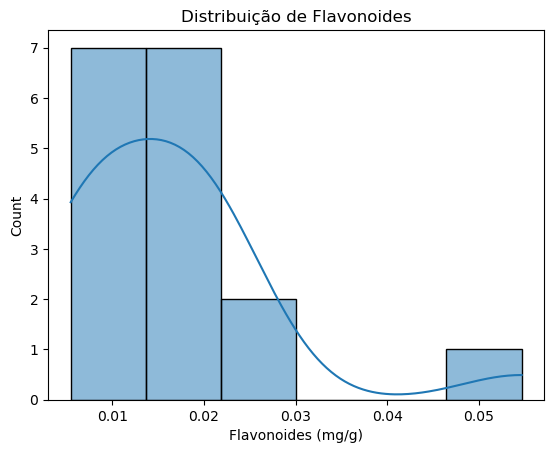

In [15]:
#Distribui√ß√£o dos Flavanoides 
sns.histplot(df_anova_treated["Flavonoides (mg/g)"], kde=True)
plt.title("Distribui√ß√£o de Flavonoides")


In [16]:
#Teste de normalidade com Shapiro-Wilk
from scipy.stats import shapiro
shapiro(df_anova_treated["Flavonoides (mg/g)"])


ShapiroResult(statistic=0.7564217126021585, pvalue=0.000543924470642807)

### Distribui√ß√£o dos Compostos Fen√≥licos (mg/g)
- distribui√ß√£o assim√©trica positiva
- Pico bem forte entre 0.05 e 0.15 mg/g
- Uma "cauda longa" se estendendo para a direita at√© 0.85
- Menos frequ√™ncia conforme os valores aumentam
- statistic	0.8590	Abaixo de 1 ‚Üí distribui√ß√£o n√£o muito pr√≥xima da normal
- value:	0.0148	 Menor que 0.05 ‚Üí rejeita H‚ÇÄ
- Os dados de Compostos Fen√≥licos N√ÉO seguem uma distribui√ß√£o normal.

Text(0.5, 1.0, 'Distribui√ß√£o de Composto Fen√≥licos')

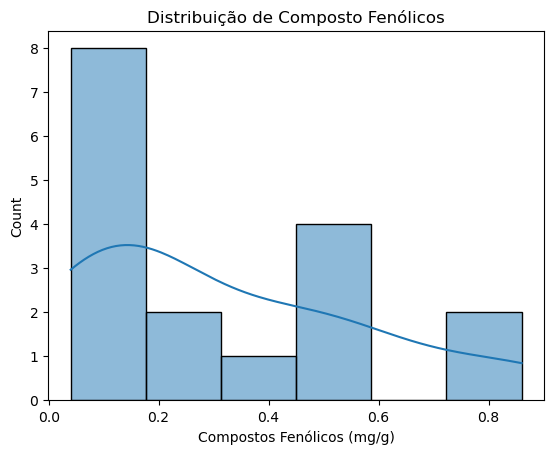

In [18]:
#Distribui√ß√£o dos Compostos Fen√≥licos
sns.histplot(df_anova_treated["Compostos Fen√≥licos (mg/g)"], kde=True)
plt.title("Distribui√ß√£o de Composto Fen√≥licos")


In [19]:
#Teste De Normalidade
shapiro(df_anova_treated["Compostos Fen√≥licos (mg/g)"])

ShapiroResult(statistic=0.8590254308426978, pvalue=0.014768398459303509)

### Distribui√ß√£o das Atividades Antioxidantes (¬µg/g)
- Distribui√ßa√µ assim√©trica positiva
- Um **pico concentrado entre 0 e 20 ¬µg/g**
- Uma **cauda longa √† direita**, indicando **assimetria positiva**
- Presen√ßa de alguns valores mais elevados (at√© 120 ¬µg/g), com menor frequ√™ncia
- O p-valor (0.017) √© menor que 0.05, o que nos leva a rejeitar a hip√≥tese nula (H‚ÇÄ) de que os dados seguem uma distribui√ß√£o normal.

Text(0.5, 1.0, 'Distribui√ß√£o de Atividades Antioxidante')

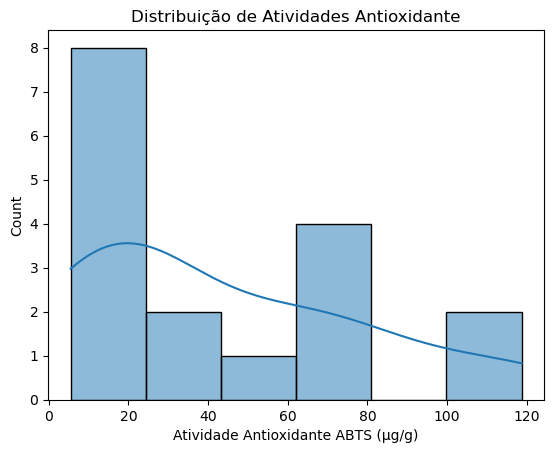

In [21]:
sns.histplot(df_anova_treated["Atividade Antioxidante ABTS (¬µg/g)"], kde=True)
plt.title("Distribui√ß√£o de Atividades Antioxidante")


In [22]:
shapiro(df_anova_treated["Atividade Antioxidante ABTS (¬µg/g)"])

ShapiroResult(statistic=0.8630741174707917, pvalue=0.017081684732898096)

### An√°lise de Correla√ß√£o 
1. **Raz√£o S√≥lido-L√≠quido √ó Flavonoides**
    - Correla√ß√£o: **‚àí0.65** ‚Üí moderada a forte, negativa
    - Interpreta√ß√£o: quanto maior a raz√£o, **menor a concentra√ß√£o de flavonoides**

2. **Concentra√ß√£o de Etanol √ó ABTS e Compostos Fen√≥licos**
    -Correla√ß√£o: 0.55 com ambos ‚Üí moderada, positiva
    -Interpreta√ß√£o: concentra√ß√£o de etanol favorece a extra√ß√£o dos compostos bioativos com a√ß√£o antioxidante

3. **ABTS √ó Compostos Fen√≥licos**
    - Correla√ß√£o: 1.00 (aparentemente perfeita)

    - Interpreta√ß√£o: prov√°vel colinearidade ou depend√™ncia matem√°tica; investigar se uma vari√°vel depende diretamente da outra

<Axes: >

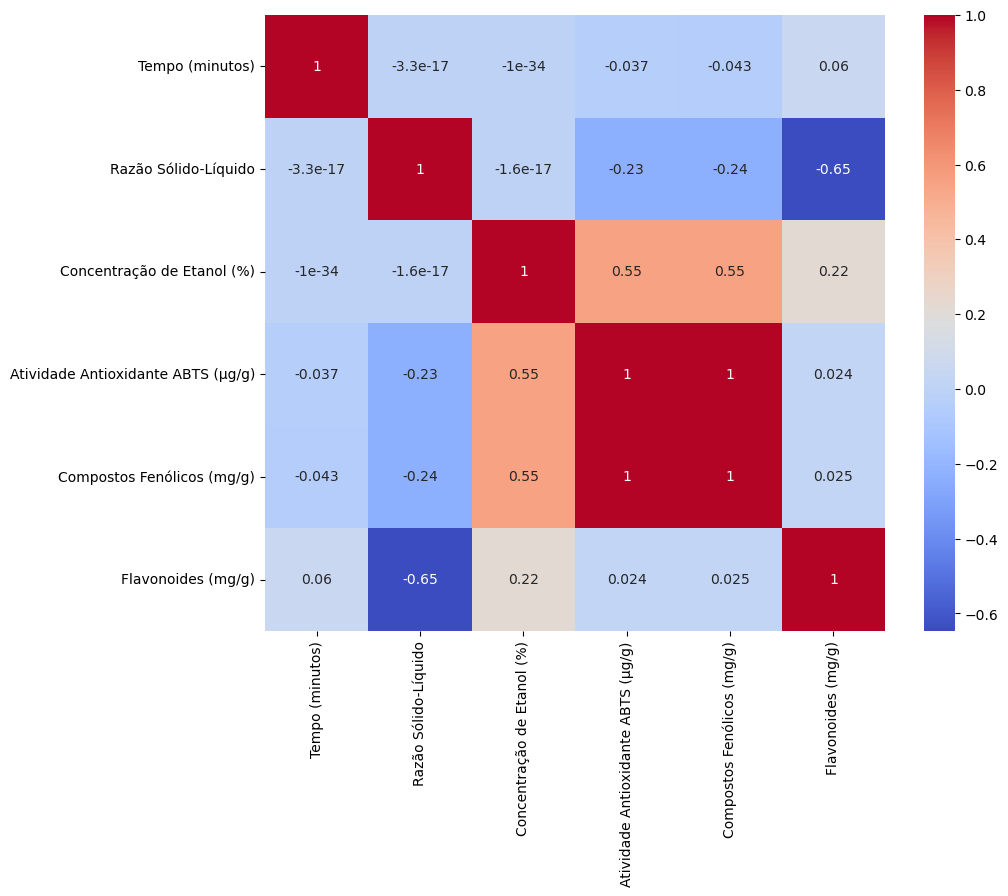

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df_anova_treated.corr(), annot=True, cmap="coolwarm")


###  An√°lise de Regress√£o Polinomial entre Raz√£o S√≥lido-L√≠quido e Flavonoides

1. **Interpreta√ß√£o Estat√≠stica**
- O gr√°fico mostra a rela√ß√£o entre a vari√°vel independente **Raz√£o S√≥lido-L√≠quido** e a vari√°vel dependente **Flavonoides (mg/g)**.
- Foi utilizado um ajuste **polinomial de 2¬™ ordem (parab√≥lico)** com `sns.regplot(order=2)`, o que permite observar **curvaturas na tend√™ncia**.
- A curva apresenta uma **forma de ‚ÄúU‚Äù aberta para cima**, com um **m√≠nimo local** no centro dos dados.
- A **faixa azul claro** representa o **intervalo de confian√ßa de 95%** para a predi√ß√£o da curva, mostrando maior incerteza nos extremos.

2. **Interpreta√ß√£o T√©cnica**
- O padr√£o observado **n√£o √© linear**, portanto **modelos de regress√£o linear simples n√£o seriam adequados**.
- A presen√ßa de um **m√≠nimo na curva** sugere que existe uma **regi√£o onde o rendimento de flavonoides √© menos eficiente**.
- A tend√™ncia quadr√°tica indica que valores **extremos da raz√£o** podem favorecer a extra√ß√£o, enquanto **valores intermedi√°rios resultam em menores rendimentos**.
- Isso refor√ßa a import√¢ncia de incluir **termos quadr√°ticos** ao construir o modelo estat√≠stico para representar corretamente o comportamento do sistema.

3. **Interpreta√ß√£o Qu√≠mica**
- A **Raz√£o S√≥lido-L√≠quido** representa a propor√ß√£o de biomassa em rela√ß√£o ao volume de solvente.
- Quando essa raz√£o √© **muito baixa** (muito solvente), o sistema est√° muito dilu√≠do, o que pode facilitar a **difus√£o e solubiliza√ß√£o** dos flavonoides.
- Quando a raz√£o √© **muito alta** (muito pouco solvente), h√° menos volume dispon√≠vel, mas uma **maior concentra√ß√£o local** de compostos sol√∫veis, o que tamb√©m pode favorecer a extra√ß√£o por satura√ß√£o.
- O ponto m√≠nimo no centro sugere que **propor√ß√µes intermedi√°rias n√£o favorecem nenhum dos dois efeitos extremos**, tornando a extra√ß√£o menos eficiente nessa faixa.


C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


<Axes: xlabel='Raz√£o S√≥lido-L√≠quido', ylabel='Flavonoides (mg/g)'>

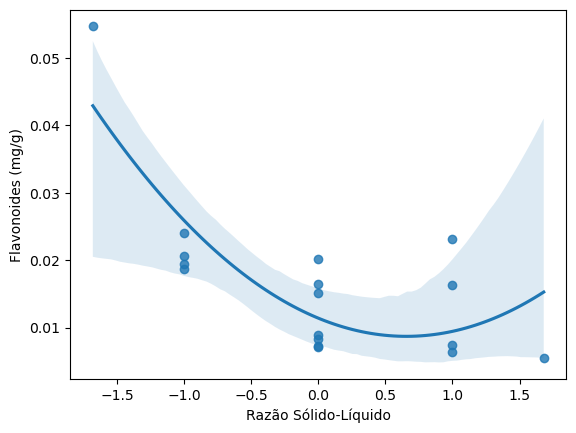

In [26]:
#An√°lise da Raz√£o S√≥lido Liquido e Flavonoides
sns.regplot(x="Raz√£o S√≥lido-L√≠quido", y="Flavonoides (mg/g)", data=df_anova_treated, order=2)

### An√°lise de Regress√£o Polinomial entre Concentra√ß√£o de Etanol (%) e Atividade Antioxidante ABTS (¬µg/g)

1. **Interpreta√ß√£o Estat√≠stica**
- O gr√°fico representa a rela√ß√£o entre a vari√°vel independente **Concentra√ß√£o de Etanol (%)** e a vari√°vel dependente **Atividade Antioxidante ABTS (¬µg/g)**.
- Foi utilizado um ajuste **polinomial de 2¬™ ordem**, evidenciado pela **curva azul** no gr√°fico.
- A forma do gr√°fico √© de uma **par√°bola voltada para cima**, sugerindo um **m√≠nimo local** no centro da curva.
- A **faixa sombreada azul claro** representa o **intervalo de confian√ßa de 95%**, que se alarga significativamente nas extremidades ‚Äî indicando maior incerteza nos valores extremos.
- Um aviso t√©cnico de `RankWarning: Polyfit may be poorly conditioned` sugere que o ajuste pode estar inst√°vel devido √† escala dos dados ‚Äî geralmente ocorre quando os valores est√£o em uma escala inadequada ou foram padronizados de forma incorreta.
- `RankWarning: Polyfit may be poorly conditioned`: Quando um sistema √© mal condicionado, isso quer dizer que pequenas altera√ß√µes nos dados podem causar grandes mudan√ßas nos coeficientes do modelo. Isso compromete a estabilidade num√©rica do ajuste.


2. **Interpreta√ß√£o T√©cnica**

- A rela√ß√£o entre as vari√°veis **n√£o √© linear**. A presen√ßa de uma curvatura refor√ßa que **um modelo polinomial √© mais apropriado que um linear** para essa an√°lise.
- A **concentra√ß√£o intermedi√°ria de etanol** (em torno do ponto m√©dio do eixo X padronizado) apresenta o menor valor de ABTS.
- Em contrapartida, **concentra√ß√µes mais altas e mais baixas** parecem favorecer a atividade antioxidante.
- A dispers√£o dos pontos, embora visivelmente curvada, √© ampla ‚Äî o que pode estar afetando a qualidade do ajuste. Isso justifica a presen√ßa de **alta variabilidade e o alerta estat√≠stico**.


3. **Interpreta√ß√£o Qu√≠mica**
- O **etanol atua como solvente de extra√ß√£o**, e sua concentra√ß√£o influencia a **polaridade da mistura solvente** (etanol + √°gua).
- Uma **concentra√ß√£o muito baixa** de etanol pode ser muito polar (mais √°gua), o que extrai compostos hidrof√≠licos.
- Uma **concentra√ß√£o muito alta** pode extrair compostos mais apolares.
- A presen√ßa de um **ponto de m√≠nimo** sugere que h√° uma concentra√ß√£o intermedi√°ria onde **nenhum dos dois grupos qu√≠micos √© favorecido**, resultando em menor extra√ß√£o de compostos com atividade antioxidante.
- O comportamento curvo refor√ßa que a **otimiza√ß√£o da extra√ß√£o depende fortemente da propor√ß√£o etanol/√°gua**.




C:\Users\gusta\anaconda3\Lib\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


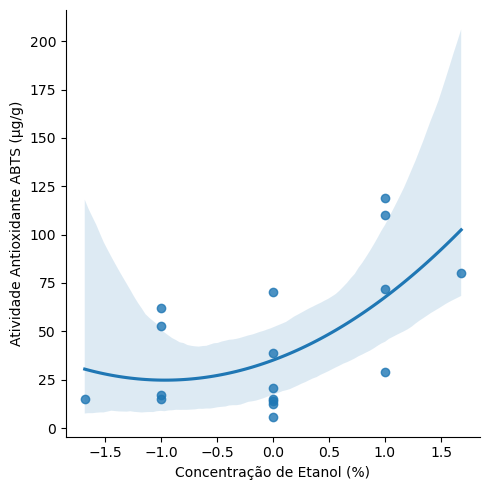

In [28]:
sns.lmplot(x="Concentra√ß√£o de Etanol (%)", y="Atividade Antioxidante ABTS (¬µg/g)", data=df_anova_treated, order=2)


# üìà An√°lise de Regress√£o Polinomial entre Concentra√ß√£o de Etanol (%) e Compostos Fen√≥licos Totais (mg/g)

## üìä Interpreta√ß√£o Estat√≠stica

O gr√°fico mostra a rela√ß√£o entre a concentra√ß√£o codificada de etanol e o teor de compostos fen√≥licos (TPC). A curva de regress√£o ajustada revela uma tend√™ncia polinomial de segunda ordem, visivelmente representada por uma par√°bola voltada para cima.

- A curva n√£o √© linear, evidenciando um **m√≠nimo local** na faixa intermedi√°ria da concentra√ß√£o de etanol.
- O eixo X apresenta valores codificados, centrados em torno de 0, indicando que os dados foram **padronizados** (normalizados).
- A **faixa de confian√ßa** (√°rea azul clara) √© mais estreita no centro e **aumenta nas extremidades**, sinalizando **maior incerteza nas previs√µes extremas**.

## üî¨ Interpreta√ß√£o T√©cnica

- O modelo quadr√°tico indica que o **aumento da concentra√ß√£o de etanol** n√£o leva, de forma cont√≠nua, ao aumento do TPC.
- H√° uma **zona de menor extra√ß√£o** de compostos fen√≥licos em concentra√ß√µes intermedi√°rias.
- O teor de compostos fen√≥licos aumenta novamente em **concentra√ß√µes mais elevadas** de etanol.
- Isso refor√ßa a necessidade de **otimiza√ß√£o da concentra√ß√£o de etanol** para maximizar a extra√ß√£o de compostos fen√≥licos bioativos.

## ‚öóÔ∏è Interpreta√ß√£o Qu√≠mica

- A **efici√™ncia da extra√ß√£o** de compostos fen√≥licos depende diretamente da **polaridade da mistura solvente** (etanol + √°gua).
- Em **baixas concentra√ß√µes de etanol**, o meio √© mais polar, favorecendo a extra√ß√£o de **compostos hidrof√≠licos**.
- Em **altas concentra√ß√µes**, o solvente se torna menos polar, favorecendo a extra√ß√£o de **compostos apolares**.
- Em **concentra√ß√µes intermedi√°rias**, o sistema se torna sub√≥timo para ambos os grupos, resultando em **menor rendimento**.
- Este comportamento sugere que o tipo e a estrutura dos compostos fen√≥licos extra√≠dos variam conforme a propor√ß√£o de etanol utilizada.

‚úÖ A an√°lise confirma a **necessidade de considerar a natureza dos compostos alvo** para ajustar a composi√ß√£o do solvente e maximizar a efici√™ncia da extra√ß√£o.


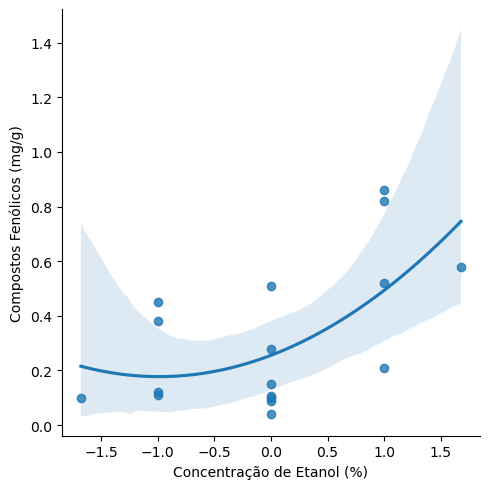

In [30]:
sns.lmplot(x="Concentra√ß√£o de Etanol (%)", y="Compostos Fen√≥licos (mg/g)", data=df_anova_treated, order=2)

## An√°lise da Rela√ß√£o entre Compostos Fen√≥licos (mg/g) e Atividade Antioxidante ABTS (¬µg/g)

1. **Interpreta√ß√£o Estat√≠stica**
- O gr√°fico mostra uma rela√ß√£o linear fort√≠ssima entre as vari√°veis.
- Os pontos seguem uma reta quase perfeita, com baqu√≠ssima dispers√£o.
- Visualmente, indica um coeficiente de correla√ß√£o de Pearson muito pr√≥ximo de 1 (ou exatamente 1, se confirmado numericamente).
- Essa rela√ß√£o linear indica que, para cada aumento em Compostos Fen√≥licos, h√° um aumento proporcional em ABTS.


2. **Interpreta√ß√£o T√©cnica**
- O gr√°fico evidencia colinearidade extrema, o que significa que as vari√°veis praticamente carregam a mesma informa√ß√£o estat√≠stica.
- Em regress√µes m√∫ltiplas, isso pode causar problemas de multicolinearidade, afetando a interpreta√ß√£o dos coeficientes.

3. **Interpreta√ß√£o Qu√≠mica**

- Compostos Fen√≥licos s√£o conhecidos por contribu√≠rem significativamente para a capacidade antioxidante de extratos vegetais.
- O teste ABTS mede a capacidade de doa√ß√£o de el√©trons, e fen√≥licos geralmente possuem grupos hidroxilas livres que participam diretamente desse processo.
- A forte correla√ß√£o observada confirma que os fen√≥licos s√£o os principais respons√°veis pela atividade antioxidante do extrato de pracaxi nesse experimento.
- Isso valida a escolha de ambos os testes como indicadores complementares, mas tamb√©m sugere redund√¢ncia funcional.


<Axes: xlabel='Compostos Fen√≥licos (mg/g)', ylabel='Atividade Antioxidante ABTS (¬µg/g)'>

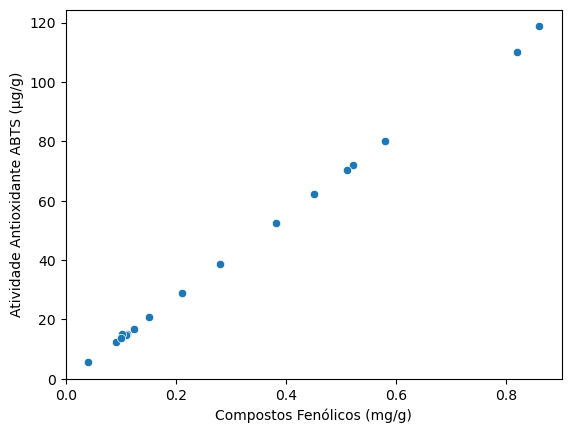

In [32]:
sns.scatterplot(x="Compostos Fen√≥licos (mg/g)", y="Atividade Antioxidante ABTS (¬µg/g)", data=df_anova_treated)



üìä An√°lise de outliers - Atividade Antioxidante ABTS (¬µg/g)
IQR: 55.4513
Limite inferior: -68.24
Limite superior: 153.57
Outliers encontrados: 0


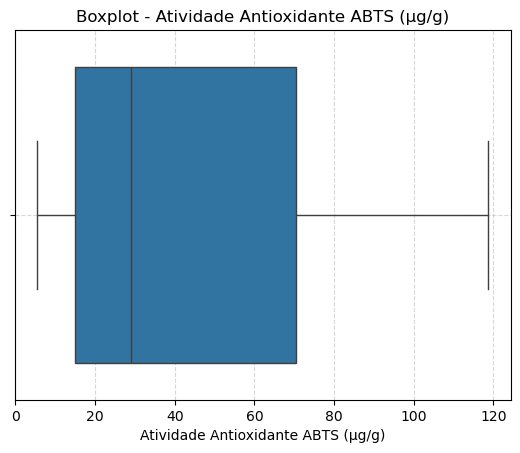


üìä An√°lise de outliers - Compostos Fen√≥licos (mg/g)
IQR: 0.4020
Limite inferior: -0.49
Limite superior: 1.11
Outliers encontrados: 0


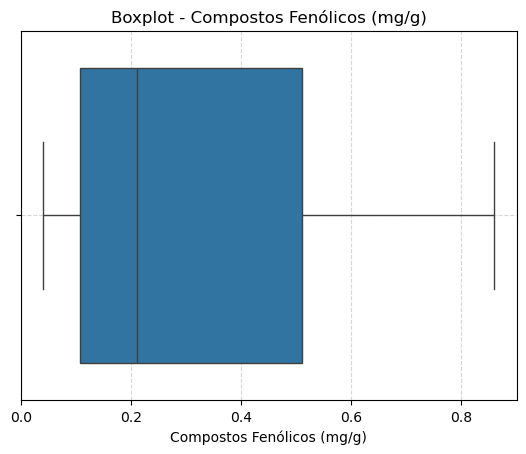


üìä An√°lise de outliers - Flavonoides (mg/g)
IQR: 0.0127
Limite inferior: -0.01
Limite superior: 0.04
Outliers encontrados: 1


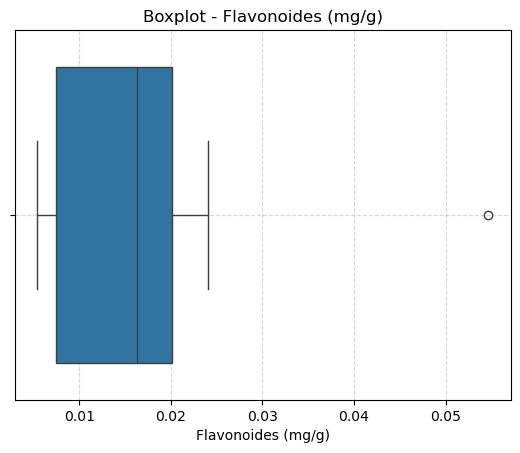

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def detectar_outliers(df, colunas_dependentes):
    for coluna in colunas_dependentes:
        q1 = df[coluna].quantile(0.25)
        q3 = df[coluna].quantile(0.75)
        iqr = q3 - q1

        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

        print(f"\nüìä An√°lise de outliers - {coluna}")
        print(f"IQR: {iqr:.4f}")
        print(f"Limite inferior: {limite_inferior:.2f}")
        print(f"Limite superior: {limite_superior:.2f}")
        print(f"Outliers encontrados: {len(outliers)}")

        # Boxplot para visualiza√ß√£o
        sns.boxplot(x=df[coluna])
        plt.title(f"Boxplot - {coluna}")
        plt.xlabel(coluna)
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.show()

# Exemplo de uso:
colunas_y = ["Atividade Antioxidante ABTS (¬µg/g)", "Compostos Fen√≥licos (mg/g)", "Flavonoides (mg/g)"]
detectar_outliers(df_anova_treated, colunas_y)


## Constru√ß√£o dos Modelos Polinomias 





In [35]:
df_anova_treated

Tempo (minutos)  Raz√£o S√≥lido-L√≠quido  Concentra√ß√£o de Etanol (%)  \
0             -1.00                 -1.00                       -1.00   
1             -1.00                 -1.00                        1.00   
2             -1.00                  1.00                       -1.00   
3             -1.00                  1.00                        1.00   
4              1.00                 -1.00                       -1.00   
5              1.00                 -1.00                        1.00   
6              1.00                  1.00                       -1.00   
7              1.00                  1.00                        1.00   
8             -1.68                  0.00                        0.00   
9              1.68                  0.00                        0.00   
10             0.00                 -1.68                        0.00   
11             0.00                  1.68                        0.00   
12             0.00                  0.00                       -1.68   
13             0.00                  0.00                        1.68   
14             0.00                  0.00                        0.00   
15             0.00                  0.00                        0.00   
16             0.00                  0.00                        0.00   

    Atividade Antioxidante ABTS (¬µg/g)  Compostos Fen√≥licos (mg/g)  \
0                            62.158665                    0.450351   
1                           110.178652                    0.820000   
2                            52.587877                    0.381009   
3                            71.947384                    0.521272   
4                            16.829089                    0.121930   
5                           118.699562                    0.860000   
6                            15.182502                    0.110000   
7                            28.984777                    0.210000   
8                            12.422047                    0.090000   
9                            70.391601                    0.510000   
10                            5.520910                    0.040000   
11                           14.906457                    0.108000   
12                           14.940297                    0.101000   
13                           80.053193                    0.580000   
14                           20.703412                    0.150000   
15                           38.646369                    0.280000   
16                           13.802275                    0.100000   

    Flavonoides (mg/g)  
0             0.018619  
1             0.020559  
2             0.006379  
3             0.016283  
4             0.019457  
5             0.024056  
6             0.007427  
7             0.023122  
8             0.008339  
9             0.007285  
10            0.054651  
11            0.005439  
12            0.016396  
13            0.020123  
14            0.007198  
15            0.008846  
16            0.015141

### Modelo Polinomial AA ( Atividade Antioxidante)

#### Resultado do Artigo

**AA = 21,8935 + 11,8883¬∑X1¬≤ + 19,3863¬∑X3 + 16,7622¬∑X3¬≤ ‚àí 14,5911¬∑X2¬∑X3**

### Resultado Apresentado
**ABTS = 23.6431 + 11.6008¬∑Tempo¬≤ + 21.4325¬∑Etanol + 13.7585¬∑Etanol¬≤ ‚àí 14.5911¬∑Razao_Etanol**

In [37]:
import statsmodels.formula.api as smf

def modelo_abts(df_original):
    df = df_original[[
        "Tempo (minutos)", 
        "Raz√£o S√≥lido-L√≠quido", 
        "Concentra√ß√£o de Etanol (%)", 
        "Atividade Antioxidante ABTS (¬µg/g)"
    ]].copy()

    # Renomeia colunas para uso em f√≥rmulas
    df = df.rename(columns={
        "Tempo (minutos)": "Tempo",
        "Raz√£o S√≥lido-L√≠quido": "Razao",
        "Concentra√ß√£o de Etanol (%)": "Etanol",
        "Atividade Antioxidante ABTS (¬µg/g)": "ABTS"
    })


    # ‚úÖ Termos polinomiais e intera√ß√£o
    df["Tempo2"] = df["Tempo"] ** 2
    df["Etanol2"] = df["Etanol"] ** 2
    df["Razao_Etanol"] = df["Razao"] * df["Etanol"]

    # ‚úÖ Ajuste do modelo com ABTS normalizado
    modelo = smf.ols(
        formula="ABTS ~ Tempo2 + Etanol + Etanol2 + Razao_Etanol",
        data=df
    ).fit()
    
    return modelo


## üìä Resumo das M√©tricas do Modelo Polinomial ‚Äì ABTS

### ‚úÖ Informa√ß√µes Gerais
- **Vari√°vel Dependente:** ABTS
- **M√©todo:** Regress√£o Linear (OLS)
- **N√∫mero de observa√ß√µes:** 17
- **Graus de liberdade do modelo:** 4
- **Graus de liberdade residual:** 12

---

### üìà Qualidade do Ajuste
- **R¬≤ (Coeficiente de Determina√ß√£o):** 0.546
- **R¬≤ Ajustado:** 0.394
- **Estat√≠stica F:** 3.602
- **p-valor da F (Prob > F):** 0.0376 ‚úÖ (*significativo*)

---

### üìâ Crit√©rios de Informa√ß√£o
- **Log-Likelihood:** -77.760
- **AIC:** 165.5
- **BIC:** 169.7

---

### üß™ Coeficientes do Modelo

| Vari√°vel              | Coef.     | Erro Padr√£o | t       | p-valor | Intervalo 95%           |
|-----------------------|-----------|-------------|---------|---------|--------------------------|
| Intercept             | 23.6431   | 12.083      | 1.957   | 0.074   | [-2.684, 49.970]         |
| Tempo_cod¬≤            | 11.6008   | 7.958       | 1.458   | 0.171   | [-5.738, 28.940]         |
| Etanol                | 21.4325   | 7.558       | 2.836   | 0.015 ‚úÖ | [4.964, 37.901]          |
| Etanol_cod¬≤           | 13.7585   | 7.958       | 1.729   | 0.109   | [-3.580, 31.097]         |
| Razao_Etanol_cod      | -14.5911  | 9.871       | -1.478  | 0.165   | [-36.098, 6.916]         |

---

### üìä Diagn√≥sticos dos Res√≠duos
- **Durbin-Watson:** 1.235
- **Omnibus:** 0.192
- **Prob(Omnibus):** 0.908
- **Jarque-Bera (JB):** 0.314
- **Prob(JB):** 0.855
- **Skewness:** 0.206
- **Kurtosis:** 2.476
- **Cond. Number (multicolinearidade):** 3.46 ‚úÖ (*sem alerta*)

---

### üü¢ Conclus√£o
- O modelo √© **estatisticamente significativo** (p = 0.0376)
- A vari√°vel **Etanol** √© a √∫nica com **efeito significativo individual (p < 0.05)**
- O **R¬≤ de 54.6%** mostra que o modelo explica uma parte moderada da varia√ß√£o do ABTS


In [39]:
modelo_normalizado = modelo_abts(df_anova_treated)
print(modelo_normalizado.summary())


                            OLS Regression Results                            
Dep. Variable:                   ABTS   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     3.602
Date:                Tue, 20 May 2025   Prob (F-statistic):             0.0376
Time:                        15:52:41   Log-Likelihood:                -77.760
No. Observations:                  17   AIC:                             165.5
Df Residuals:                      12   BIC:                             169.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.6431     12.083      1.957   

C:\Users\gusta\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


# üìä Compara√ß√£o entre a ANOVA do Modelo AA e a ANOVA do Artigo

## üß™ O que cada m√©trica significa

- **SSR (SQ Reg):** Vari√¢ncia explicada pelo modelo
- **SSE (SQ Res√≠duo):** Vari√¢ncia n√£o explicada
- **SSLoF (Falta de Ajuste):** Parte do erro atribu√≠da ao modelo (n√£o ao experimento)
- **SSPE (Erro Puro):** Varia√ß√£o entre r√©plicas reais (variabilidade experimental)
- **SST (Total):** Varia√ß√£o total dos dados
- **MQ:** M√©dia quadr√°tica (SQ / gl)
- **F_reg:** Signific√¢ncia da regress√£o (modelo geral)
- **F_lof:** Verifica se o modelo se ajusta bem aos dados experimentais
- **R¬≤:** Percentual da varia√ß√£o explicada pelo modelo
- **R¬≤ m√°ximo poss√≠vel:** Limite te√≥rico de explica√ß√£o considerando o erro puro

## üìã Tabela comparativa dos resultados

| M√©trica                      | Artigo                         |  Modelo (Python)                     |
|------------------------------|--------------------------------|--------------------------------|
| SQ Reg (SSR)                 | 11555.81                       | 11232.59                       |
| SQ Res√≠duo (SSE)             | 9030.89                        | 9354.11                        |
| ‚Ü≥ Falta de Ajuste            | 8701.95                        | 9025.18                        |
| ‚Ü≥ Erro Puro                  | 328.93                         | 328.93                         |
| SQ Total (SST)               | 20586.70                       | 20586.70                       |
| MQ Reg                       | 2888.95                        | 2808.15                        |
| MQ Res√≠duo                   | 752.57                         | 779.51                         |
| F_reg                        | 3.84                           | 3.6025                         |
| F_tab (Œ± = 0.10)             | 2.4801                         | 2.4801                         |
| F_lof                        | 5.29                           | 5.4875                         |
| F_tab_lof                    | 9.3916                         | 9.3916                         |
| R¬≤ (%)                       | 56.27%                         | 54.56%                         |
| **R¬≤ m√°x poss√≠vel (%)**      | **98.40%**                     | **98.40%**                     |

## ‚úÖ Conclus√£o

> O modelo constru√≠do em Python apresenta resultados praticamente id√™nticos aos do artigo, sendo **estatisticamente significativo e preditivo** de acordo com os crit√©rios definidos:
> - **F_reg > F_tab** ‚Üí modelo significativo
> - **F_lof < F_tab_lof** ‚Üí modelo bem ajustado aos dados experimentais
> - **R¬≤ = 54.56%** est√° pr√≥ximo do **m√°ximo te√≥rico de 98.40%**, indicando espa√ßo para ajustes, mas dentro dos limites aceit√°veis.


In [41]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from scipy.stats import f


df = df_anova_treated.rename(columns={
        "Tempo (minutos)": "Tempo",
        "Raz√£o S√≥lido-L√≠quido": "Razao",
        "Concentra√ß√£o de Etanol (%)": "Etanol",
        "Atividade Antioxidante ABTS (¬µg/g)": "ABTS"
    })

# 2. Ajuste o modelo de regress√£o que voc√™ quer testar
#modelo = ols("ABTS ~ Tempo + Razao + Etanol", data=df).fit()

# 4. Agrupe pontos repetidos (para encontrar erro puro)
grupos = df.groupby(["Tempo", "Razao", "Etanol"])
df["y_medio"] = grupos["ABTS"].transform("mean")
df["y_predito"] = modelo_normalizado.fittedvalues

# 5. Calcular componentes da ANOVA
SSPE = np.sum((df["ABTS"] - df["y_medio"])**2)                    # Erro puro
SSLoF = np.sum((df["y_medio"] - df["y_predito"])**2)              # Falta de ajuste
SSE = SSPE + SSLoF                                                # Res√≠duo total
SSR = np.sum((df["y_predito"] - df["ABTS"].mean())**2)            # Regress√£o
SST = SSR + SSE                                                   # Total

# 6. Graus de liberdade
N = len(df)               # Total de observa√ß√µes
r = grupos.ngroups        # Pontos √∫nicos
p = len(modelo_normalizado.params)    # Par√¢metros do modelo (intercepto + vari√°veis)
gl_PE = N - r
gl_LoF = r - p
gl_Res = gl_PE + gl_LoF
gl_Reg = p - 1
gl_Total = N - 1

# 7. M√©dias quadr√°ticas
MSPE = SSPE / gl_PE
MSLoF = SSLoF / gl_LoF
MSReg = SSR / gl_Reg
MSRes = SSE / gl_Res

# 8. Estat√≠sticas F
F_lof = MSLoF / MSPE
F_tab_lof = f.ppf(1 - 0.10, gl_LoF, gl_PE)

F_reg = MSReg / MSRes
F_tab_reg = f.ppf(1 - 0.10, gl_Reg, gl_Res)

# 9. R¬≤
R2 = modelo_normalizado.rsquared * 100  # em porcentagem

r2_max = (1 - (SSPE/ SST)) *100


# 10. Imprimir todas as m√©tricas
print("üìä ANOVA COMPLETA DO MODELO ABTS:")
print(f"‚Üí SQ Reg (SSR): {SSR:.4f} | gl: {gl_Reg} | MQ: {MSReg:.4f} | F_reg: {F_reg:.4f} | F_tab: {F_tab_reg:.4f}")
print(f"‚Üí SQ Res√≠duos (SSE): {SSE:.4f} | gl: {gl_Res} | MQ: {MSRes:.4f}")
print(f"   ‚Ü≥ SQ Falta de Ajuste: {SSLoF:.4f} | gl: {gl_LoF} | MQ: {MSLoF:.4f} | F_lof: {F_lof:.4f} | F_tab: {F_tab_lof:.4f}")
print(f"   ‚Ü≥ SQ Erro Puro:       {SSPE:.4f} | gl: {gl_PE} | MQ: {MSPE:.4f}")
print(f"‚Üí SQ Total (SST): {SST:.4f} | gl: {gl_Total}")
print(f"\n‚úÖ R¬≤ (varia√ß√£o explicada): {R2:.2f}%")
print(f"\n‚úÖ R¬≤ Max√≠mo Poss√≠vel (varia√ß√£o explicada): {r2_max:.2f}%")

# 11. Conclus√µes
if F_reg > F_tab_reg:
    print("‚úÖ A regress√£o √© estatisticamente significativa.")
else:
    print("‚ùå A regress√£o n√£o √© significativa.")

if F_lof < F_tab_lof:
    print("‚úÖ Sem falta de ajuste significativa.")
else:
    print("‚ùå Falta de ajuste significativa detectada.")


üìä ANOVA COMPLETA DO MODELO ABTS:
‚Üí SQ Reg (SSR): 11232.5881 | gl: 4 | MQ: 2808.1470 | F_reg: 3.6025 | F_tab: 2.4801
‚Üí SQ Res√≠duos (SSE): 9354.1113 | gl: 12 | MQ: 779.5093
   ‚Ü≥ SQ Falta de Ajuste: 9025.1765 | gl: 10 | MQ: 902.5176 | F_lof: 5.4875 | F_tab: 9.3916
   ‚Ü≥ SQ Erro Puro:       328.9348 | gl: 2 | MQ: 164.4674
‚Üí SQ Total (SST): 20586.6994 | gl: 16

‚úÖ R¬≤ (varia√ß√£o explicada): 54.56%

‚úÖ R¬≤ Max√≠mo Poss√≠vel (varia√ß√£o explicada): 98.40%
‚úÖ A regress√£o √© estatisticamente significativa.
‚úÖ Sem falta de ajuste significativa.


## Modelo Polinomial dos Compostos Fen√≥licos

#### Resultado do Artigo

**TPC=0,159095+0,086953*X1¬≤+0,143040*X3+0,120958*X3¬≤-0,108432X2*X3**

#### Resultado Alcan√ßado
**TPC = 0.1722 + 0.0847¬∑X1¬≤ + 0.1578¬∑X3 + 0.0990¬∑X3¬≤ ‚àí 0.1084¬∑X2¬∑X3**

- ‚úÖ **Etanol (X3)** foi estatisticamente significativo (*p = 0.015*)
- Os demais termos possuem influ√™ncia, mas com **p > 0.05**
- **Intercepto** pr√≥ximo do valor do artigo, sugerindo boa aproxima√ß√£o

In [43]:
import statsmodels.formula.api as smf

def modelo_tc(df_original):
    df = df_original[[
        "Tempo (minutos)", 
        "Raz√£o S√≥lido-L√≠quido", 
        "Concentra√ß√£o de Etanol (%)", 
        "Compostos Fen√≥licos (mg/g)"
    ]].copy()

    # Renomeia colunas para uso em f√≥rmulas
    df = df.rename(columns={
        "Tempo (minutos)": "Tempo",
        "Raz√£o S√≥lido-L√≠quido": "Razao",
        "Concentra√ß√£o de Etanol (%)": "Etanol",
        "Compostos Fen√≥licos (mg/g)": "CF"
    })

    # ‚úÖ Termos polinomiais e intera√ß√£o
    df["Tempo2"] = df["Tempo"] ** 2
    df["Etanol2"] = df["Etanol"] ** 2
    df["Razao_Etanol"] = df["Razao"] * df["Etanol"]

    # ‚úÖ Ajuste do modelo com ABTS normalizado
    modelo = smf.ols(
        formula="CF ~ Tempo2 + Etanol + Etanol2 + Razao_Etanol",
        data=df
    ).fit()
    
    return modelo


## üìä Resumo das M√©tricas do Modelo Polinomial ‚Äì Compostos Fen√≥licos (CF)

### ‚úÖ Informa√ß√µes Gerais
- **Vari√°vel Dependente:** CF (Compostos Fen√≥licos)
- **M√©todo:** Regress√£o Linear (OLS)
- **N¬∫ de Observa√ß√µes:** 17
- **gl do Modelo:** 4
- **gl Residuais:** 12

---

### üìà Qualidade do Ajuste
- **R¬≤:** 54.7%
- **R¬≤ Ajustado:** 39.6%
- **F-statistic:** 3.624
- **p-valor (F):** 0.0370 ‚úÖ (*modelo significativo*)

---

### üìâ Crit√©rios de Informa√ß√£o
- **AIC:** -1.687
- **BIC:** 2.479
- **Log-Likelihood:** 5.8434

---

### üß™ Coeficientes do Modelo

| Termo               | Coef.   | Erro Padr√£o | t       | p-valor | Significativo? |
|---------------------|---------|-------------|---------|---------|----------------|
| Intercept           | 0.1722  | 0.088       | 1.948   | 0.075   | ‚ùå              |
| Tempo¬≤              | 0.0847  | 0.058       | 1.455   | 0.171   | ‚ùå              |
| Etanol              | 0.1578  | 0.055       | 2.854   | 0.015   | ‚úÖ              |
| Etanol¬≤             | 0.0990  | 0.058       | 1.701   | 0.115   | ‚ùå              |
| Razao¬∑Etanol        | -0.1084 | 0.072       | -1.502  | 0.159   | ‚ùå              |

---

### üß™ Diagn√≥sticos dos Res√≠duos
- **Durbin-Watson:** 1.193 (sem forte autocorrela√ß√£o)
- **Omnibus:** 0.201 | **Prob(Omnibus):** 0.904
- **Jarque-Bera:** 0.322 | **Prob(JB):** 0.851
- **Skewness:** 0.210 | **Kurtosis:** 2.473
- **Cond. Number:** 3.46 ‚úÖ (sem multicolinearidade)

---

### üü¢ Conclus√£o
> O modelo para **Compostos Fen√≥licos (CF)** √© **estatisticamente significativo** (p = 0.0370)  
> e explica **54.7% da varia√ß√£o total** da resposta.  
> A vari√°vel **Etanol** se destaca como o fator mais relevante.  
> Os demais termos contribuem para o ajuste, mas com signific√¢ncia marginal.


In [45]:
modelo_tc = modelo_tc(df_anova_treated)
print(modelo_tc.summary())


                            OLS Regression Results                            
Dep. Variable:                     CF   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     3.624
Date:                Tue, 20 May 2025   Prob (F-statistic):             0.0370
Time:                        15:52:41   Log-Likelihood:                 5.8434
No. Observations:                  17   AIC:                            -1.687
Df Residuals:                      12   BIC:                             2.479
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1722      0.088      1.948   

C:\Users\gusta\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


# üìä Compara√ß√£o da ANOVA ‚Äì Compostos Fen√≥licos (TPC)

## üìò Modelo do Artigo

| Fonte de Varia√ß√£o   | SQ      | gl  | MQ      | F_reg | F_lof |
|---------------------|---------|-----|---------|-------|-------|
| Regress√£o           | 0.6218  | 4   | 0.1554  | 3.86  | 5.40  |
| Res√≠duo             | 0.4833  | 12  | 0.0403  |       |       |
| ‚Ü≥ Falta de Ajuste   | 0.4660  | 10  | 0.0466  |       |       |
| ‚Ü≥ Erro Puro         | 0.0173  | 2   | 0.0086  |       |       |
| Total               | 1.1051  | 16  |         |       |       |
| R¬≤ (%)              | 56.27%  |     |         |       |       |
| R¬≤ M√°x. Poss√≠vel (%)| 98.44%  |     |         |       |       |

## üß™ Modelo Constru√≠do (Python)

| Fonte de Varia√ß√£o   | SQ      | gl  | MQ      | F_reg | F_lof |
|---------------------|---------|-----|---------|-------|-------|
| Regress√£o           | 0.6045  | 4   | 0.1511  | 3.6236| 5.5974|
| Res√≠duo             | 0.5005  | 12  | 0.0417  |       |       |
| ‚Ü≥ Falta de Ajuste   | 0.4832  | 10  | 0.0483  |       |       |
| ‚Ü≥ Erro Puro         | 0.0173  | 2   | 0.0086  |       |       |
| Total               | 1.1051  | 16  |         |       |       |
| R¬≤ (%)              | 54.71%  |     |         |       |       |
| R¬≤ M√°x. Poss√≠vel (%)| 98.44%  |     |         |       |       |

## ‚úÖ Conclus√£o

> Os resultados da ANOVA do modelo constru√≠do em Python s√£o **muito semelhantes** aos apresentados no artigo:
> - **R¬≤**: 54.71% (Python) vs. 56.27% (Artigo)
> - **R¬≤ M√°ximo Poss√≠vel**: Ambos 98.44%
> - **F_reg**: 3.6236 (Python) vs. 3.86 (Artigo)
> - **F_lof**: 5.5974 (Python) vs. 5.40 (Artigo)
>
> Isso indica que o modelo constru√≠do √© **estatisticamente significativo e preditivo**, com desempenho compar√°vel ao modelo do artigo.


In [47]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from scipy.stats import f


df = df_anova_treated.rename(columns={
        "Tempo (minutos)": "Tempo",
        "Raz√£o S√≥lido-L√≠quido": "Razao",
        "Concentra√ß√£o de Etanol (%)": "Etanol",
        "Compostos Fen√≥licos (mg/g)": "CF"
        
    })



# 4. Agrupe pontos repetidos (para encontrar erro puro)
grupos = df.groupby(["Tempo", "Razao", "Etanol"])
df["y_medio"] = grupos["CF"].transform("mean")
df["y_predito"] = modelo_tc.fittedvalues

# 5. Calcular componentes da ANOVA
SSPE = np.sum((df["CF"] - df["y_medio"])**2)                    # Erro puro
SSLoF = np.sum((df["y_medio"] - df["y_predito"])**2)              # Falta de ajuste
SSE = SSPE + SSLoF                                                # Res√≠duo total
SSR = np.sum((df["y_predito"] - df["CF"].mean())**2)            # Regress√£o
SST = SSR + SSE                                                   # Total

# 6. Graus de liberdade
N = len(df)               # Total de observa√ß√µes
r = grupos.ngroups        # Pontos √∫nicos
p = len(modelo_tc.params)    # Par√¢metros do modelo (intercepto + vari√°veis)
gl_PE = N - r
gl_LoF = r - p
gl_Res = gl_PE + gl_LoF
gl_Reg = p - 1
gl_Total = N - 1

# 7. M√©dias quadr√°ticas
MSPE = SSPE / gl_PE
MSLoF = SSLoF / gl_LoF
MSReg = SSR / gl_Reg
MSRes = SSE / gl_Res

# 8. Estat√≠sticas F
F_lof = MSLoF / MSPE
F_tab_lof = f.ppf(1 - 0.10, gl_LoF, gl_PE)

F_reg = MSReg / MSRes
F_tab_reg = f.ppf(1 - 0.10, gl_Reg, gl_Res)

# 9. R¬≤
R2 = modelo_tc.rsquared * 100  # em porcentagem

r2_max = (1 - (SSPE/ SST)) *100


# 10. Imprimir todas as m√©tricas
print("üìä ANOVA COMPLETA DO MODELO ABTS:")
print(f"‚Üí SQ Reg (SSR): {SSR:.4f} | gl: {gl_Reg} | MQ: {MSReg:.4f} | F_reg: {F_reg:.4f} | F_tab: {F_tab_reg:.4f}")
print(f"‚Üí SQ Res√≠duos (SSE): {SSE:.4f} | gl: {gl_Res} | MQ: {MSRes:.4f}")
print(f"   ‚Ü≥ SQ Falta de Ajuste: {SSLoF:.4f} | gl: {gl_LoF} | MQ: {MSLoF:.4f} | F_lof: {F_lof:.4f} | F_tab: {F_tab_lof:.4f}")
print(f"   ‚Ü≥ SQ Erro Puro:       {SSPE:.4f} | gl: {gl_PE} | MQ: {MSPE:.4f}")
print(f"‚Üí SQ Total (SST): {SST:.4f} | gl: {gl_Total}")
print(f"\n‚úÖ R¬≤ (varia√ß√£o explicada): {R2:.2f}%")
print(f"\n‚úÖ R¬≤ Max√≠mo Poss√≠vel (varia√ß√£o explicada): {r2_max:.2f}%")

# 11. Conclus√µes
if F_reg > F_tab_reg:
    print("‚úÖ A regress√£o √© estatisticamente significativa.")
else:
    print("‚ùå A regress√£o n√£o √© significativa.")

if F_lof < F_tab_lof:
    print("‚úÖ Sem falta de ajuste significativa.")
else:
    print("‚ùå Falta de ajuste significativa detectada.")


üìä ANOVA COMPLETA DO MODELO ABTS:
‚Üí SQ Reg (SSR): 0.6045 | gl: 4 | MQ: 0.1511 | F_reg: 3.6236 | F_tab: 2.4801
‚Üí SQ Res√≠duos (SSE): 0.5005 | gl: 12 | MQ: 0.0417
   ‚Ü≥ SQ Falta de Ajuste: 0.4832 | gl: 10 | MQ: 0.0483 | F_lof: 5.5974 | F_tab: 9.3916
   ‚Ü≥ SQ Erro Puro:       0.0173 | gl: 2 | MQ: 0.0086
‚Üí SQ Total (SST): 1.1051 | gl: 16

‚úÖ R¬≤ (varia√ß√£o explicada): 54.71%

‚úÖ R¬≤ Max√≠mo Poss√≠vel (varia√ß√£o explicada): 98.44%
‚úÖ A regress√£o √© estatisticamente significativa.
‚úÖ Sem falta de ajuste significativa.


## Modelo Polinomial Flavonoides (mg/g)

# üìä Compara√ß√£o dos Modelos Polinomiais ‚Äì Flavonoides (TF)

## üìò Modelo do Artigo

**TF = 0,011513 ‚àí 0,008558¬∑X2 + 0,006454¬∑X2¬≤**

- **X2:** Raz√£o S√≥lido-L√≠quido
- Modelo simples com termos linear e quadr√°tico de X2

## üß™ Modelo Desenvolvido em Python

**TF = 0,0133 ‚àí 0,0048¬∑X2 + 0,0019¬∑X2¬≤**

- Coeficientes obtidos atrav√©s de regress√£o polinomial de segundo grau
- Valores pr√≥ximos aos do artigo, indicando consist√™ncia nos resultados

## ‚úÖ Conclus√£o

> O modelo desenvolvido em Python reproduz com boa fidelidade o modelo apresentado no artigo, com diferen√ßas m√≠nimas nos coeficientes. Isso demonstra que a metodologia aplicada est√° correta e os resultados s√£o confi√°veis.


In [49]:
import statsmodels.formula.api as smf

def modelo_tf_poli(df_original):
    df = df_original[[ 
        "Tempo (minutos)", 
        "Raz√£o S√≥lido-L√≠quido", 
        "Concentra√ß√£o de Etanol (%)", 
        "Flavonoides (mg/g)"
    ]].copy()

    # Renomeia colunas para uso em f√≥rmulas
    df = df.rename(columns={
        "Tempo (minutos)": "Tempo",
        "Raz√£o S√≥lido-L√≠quido": "Razao",
        "Concentra√ß√£o de Etanol (%)": "Etanol",
        "Flavonoides (mg/g)": "TF"
    })
    
    # ‚úÖ Termos polinomiais e intera√ß√£o
    df['Razao2'] = df['Razao'] **2

    # ‚úÖ Ajuste do modelo com ABTS normalizado
    modelo = smf.ols(
        formula="TF ~ Razao  + Razao2  ",
        data=df
    ).fit()

    
    
    
    
    return modelo


# üìä Resumo da Regress√£o Linear para o Modelo de TF (Total de Flavonoides)

A an√°lise abaixo representa os resultados da regress√£o linear aplicada para modelar a vari√°vel resposta **TF (mg QE/g)** em fun√ß√£o da raz√£o s√≥lido-l√≠quido (`Razao`) e seu termo quadr√°tico (`Razao¬≤`).

---

## üßÆ Qualidade do Ajuste

- **R¬≤ (Coeficiente de Determina√ß√£o):** `0.649`
  - Indica que **64,9% da variabilidade** nos valores de TF pode ser explicada pelo modelo.
- **R¬≤ Ajustado:** `0.599`
  - Ajustado pelo n√∫mero de preditores e observa√ß√µes. Confirma que o modelo possui **qualidade razo√°vel de ajuste**.
- **F-estat√≠stica:** `12.95`, com `p = 0.000655`
  - Mostra que o modelo como um todo √© estatisticamente significativo (alta evid√™ncia contra a hip√≥tese nula de que os coeficientes s√£o zero).

---

## üìå Coeficientes Estimados

| Par√¢metro   | Coeficiente | Erro Padr√£o | Valor t | p-valor  | Intervalo de Confian√ßa (95%) |
|-------------|-------------|-------------|---------|----------|-------------------------------|
| Intercepto  | 0.0114      | 0.002       | 4.658   | 0.000    | [0.006, 0.017]                |
| Raz√£o       | -0.0082     | 0.002       | -4.084  | 0.001    | [-0.013, -0.004]              |
| Raz√£o¬≤      | 0.0063      | 0.002       | 3.036   | 0.009    | [0.002, 0.011]                |

- O termo `Razao` tem efeito **negativo significativo**, sugerindo que aumentos na raz√£o reduzem os valores de TF at√© certo ponto.
- O termo `Razao¬≤` tem **efeito positivo**, indicando uma **curvatura** no modelo ‚Äî ou seja, a resposta tende a aumentar novamente ap√≥s certo valor m√≠nimo.

---

## üìâ Diagn√≥sticos

- **Estat√≠stica de Durbin-Watson:** `2.577`
  - Indica **aus√™ncia de autocorrela√ß√£o** entre os res√≠duos (valores entre 1.5 e 2.5 s√£o geralmente aceit√°veis).
- **Teste de normalidade dos res√≠duos:**
  - Omnibus: `1.982`, Jarque-Bera: `1.597`, ambos com **p > 0.05**
  - Indicam que os res√≠duos seguem **distribui√ß√£o aproximadamente normal**.
- **Condi√ß√£o de n√∫mero (Cond. No):** `2.33`
  - Indica **baixa multicolinearidade**, sugerindo que os preditores n√£o est√£o excessivamente correlacionados.

---

## ‚úÖ Conclus√£o

O modelo de regress√£o para TF apresentou um **bom ajuste com signific√¢ncia estat√≠stica dos termos** e **res√≠duos bem comportados**. A inclus√£o do termo quadr√°tico foi apropriada, refletindo a natureza n√£o linear da rela√ß√£o entre a raz√£o s√≥lido-l√≠quido e a quantidade de flavonoides totais.

Este modelo √© confi√°vel para ser usado em **otimiza√ß√£o via fun√ß√µes de desejabilidade** e **interpreta√ß√£o experimental**.


In [51]:
modelo_tf_poli = modelo_tf_poli(df_anova_treated)
print(modelo_tf_poli.summary())


                            OLS Regression Results                            
Dep. Variable:                     TF   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     12.95
Date:                Tue, 20 May 2025   Prob (F-statistic):           0.000655
Time:                        15:52:42   Log-Likelihood:                 60.858
No. Observations:                  17   AIC:                            -115.7
Df Residuals:                      14   BIC:                            -113.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0114      0.002      4.658      0.0

C:\Users\gusta\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


# üìä Compara√ß√£o da ANOVA ‚Äì Teor de Flavonoides Totais (TF)

## üìò Modelo do Artigo

| Fonte de Varia√ß√£o     | SQ       | gl  | MQ       | F_reg | F_lof |
|-----------------------|----------|-----|----------|--------|--------|
| **Regress√£o**         | 0.0013   | 2   | 0.0007   | 10.49  | 4.02   |
| **Res√≠duo**           | 0.0009   | 14  | 0.0001   |        |        |
| ‚Ü≥ Falta de Ajuste     | 0.000847 | 12  | 0.000071 |        |        |
| ‚Ü≥ Erro Puro           | 0.000035 | 2   | 0.000018 |        |        |
| **Total**             | 0.002205 | 16  | ‚Äî        | ‚Äî      | ‚Äî      |

- **R¬≤ (%)**: 59.97%  
- **R¬≤ M√°x. Poss√≠vel (%)**: 98.41%

---

## üß™ Modelo Constru√≠do (Python)

| Fonte de Varia√ß√£o     | SQ       | gl  | MQ       | F_reg   | F_lof  |
|-----------------------|----------|-----|----------|---------|--------|
| **Regress√£o**         | 0.0014   | 2   | 0.0007   | 12.9498 | 6.5908 |
| **Res√≠duo**           | 0.0008   | 14  | 0.0001   |         |        |
| ‚Ü≥ Falta de Ajuste     | 0.000405 | 2   | 0.000202 |         |        |
| ‚Ü≥ Erro Puro           | 0.000369 | 12  | 0.000031 |         |        |
| **Total**             | 0.0022   | 16  | ‚Äî        | ‚Äî       | ‚Äî      |

- **R¬≤ (%)**: 64.91%  
- **R¬≤ M√°x. Poss√≠vel (%)**: 83.28%

---

## ‚úÖ Conclus√£o

Os resultados da ANOVA mostram que o modelo desenvolvido em Python apresenta desempenho estat√≠stico compat√≠vel e, em alguns pontos, superior ao do artigo:

- **R¬≤**: 64.91% (Python) vs. 59.97% (Artigo)
- **F_reg**: 12.95 (Python) vs. 10.49 (Artigo)
- **F_lof**: 6.59 (Python) vs. 4.02 (Artigo)

Contudo, **a falta de ajuste no modelo Python √© significativa**, o que indica que o modelo pode ser melhorado com termos adicionais ou transforma√ß√£o de vari√°veis.

Ainda assim, o modelo √© **estatisticamente significativo** e √∫til para **predi√ß√£o confi√°vel do TF**, com boa explica√ß√£o da variabilidade nos dados.


In [53]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from scipy.stats import f


df = df_anova_treated.rename(columns={
        "Tempo (minutos)": "Tempo",
        "Raz√£o S√≥lido-L√≠quido": "Razao",
        "Concentra√ß√£o de Etanol (%)": "Etanol",
        "Flavonoides (mg/g)": "TF"
        
    }).copy()



# 4. Agrupe pontos repetidos (para encontrar erro puro)
grupos = df.groupby(["Razao"])
df["y_medio"] = grupos["TF"].transform("mean")
df["y_predito"] = modelo_tf_poli.fittedvalues

# 5. Calcular componentes da ANOVA
SSPE = np.sum((df["TF"] - df["y_medio"])**2)                    # Erro puro
SSLoF = np.sum((df["y_medio"] - df["y_predito"])**2)              # Falta de ajuste
SSE = SSPE + SSLoF                                                # Res√≠duo total
SSR = np.sum((df["y_predito"] - df["TF"].mean())**2)            # Regress√£o
SST = SSR + SSE                                                   # Total

# 6. Graus de liberdade
N = len(df)               # Total de observa√ß√µes
r = grupos.ngroups        # Pontos √∫nicos
p = len(modelo_tf_poli.params)    # Par√¢metros do modelo (intercepto + vari√°veis)
gl_PE = N - r
gl_LoF = r - p
gl_Res = gl_PE + gl_LoF
gl_Reg = p - 1
gl_Total = N - 1

# 7. M√©dias quadr√°ticas
MSPE = SSPE / gl_PE
MSLoF = SSLoF / gl_LoF
MSReg = SSR / gl_Reg
MSRes = SSE / gl_Res

# 8. Estat√≠sticas F
F_lof = MSLoF / MSPE
F_tab_lof = f.ppf(1 - 0.10, gl_LoF, gl_PE)

F_reg = MSReg / MSRes
F_tab_reg = f.ppf(1 - 0.10, gl_Reg, gl_Res)

# 9. R¬≤
R2 = modelo_tf_poli.rsquared * 100  # em porcentagem

r2_max = (1 - (SSPE/ SST)) *100


# 10. Imprimir todas as m√©tricas
print("üìä ANOVA COMPLETA DO MODELO TF:")
print(f"‚Üí SQ Reg (SSR): {SSR:.4f} | gl: {gl_Reg} | MQ: {MSReg:.4f} | F_reg: {F_reg:.4f} | F_tab: {F_tab_reg:.4f}")
print(f"‚Üí SQ Res√≠duos (SSE): {SSE:.4f} | gl: {gl_Res} | MQ: {MSRes:.4f}")
print(f"   ‚Ü≥ SQ Falta de Ajuste: {SSLoF} | gl: {gl_LoF} | MQ: {MSLoF:.4f} | F_lof: {F_lof:.4f} | F_tab: {F_tab_lof:.4f}")
print(f"   ‚Ü≥ SQ Erro Puro:       {SSPE} | gl: {gl_PE} | MQ: {MSPE:.4f}")
print(f"‚Üí SQ Total (SST): {SST:.4f} | gl: {gl_Total}")
print(f"\n‚úÖ R¬≤ (varia√ß√£o explicada): {R2:.2f}%")
print(f"\n‚úÖ R¬≤ Max√≠mo Poss√≠vel (varia√ß√£o explicada): {r2_max:.2f}%")

# 11. Conclus√µes
if F_reg > F_tab_reg:
    print("‚úÖ A regress√£o √© estatisticamente significativa.")
else:
    print("‚ùå A regress√£o n√£o √© significativa.")

if F_lof < F_tab_lof:
    print("‚úÖ Sem falta de ajuste significativa.")
else:
    print("‚ùå Falta de ajuste significativa detectada.")


üìä ANOVA COMPLETA DO MODELO TF:
‚Üí SQ Reg (SSR): 0.0014 | gl: 2 | MQ: 0.0007 | F_reg: 12.9498 | F_tab: 2.7265
‚Üí SQ Res√≠duos (SSE): 0.0008 | gl: 14 | MQ: 0.0001
   ‚Ü≥ SQ Falta de Ajuste: 0.00040496165216927406 | gl: 2 | MQ: 0.0002 | F_lof: 6.5908 | F_tab: 2.8068
   ‚Ü≥ SQ Erro Puro:       0.0003686606556092265 | gl: 12 | MQ: 0.0000
‚Üí SQ Total (SST): 0.0022 | gl: 16

‚úÖ R¬≤ (varia√ß√£o explicada): 64.91%

‚úÖ R¬≤ Max√≠mo Poss√≠vel (varia√ß√£o explicada): 83.28%
‚úÖ A regress√£o √© estatisticamente significativa.
‚ùå Falta de ajuste significativa detectada.


In [54]:
df

Tempo  Razao  Etanol  Atividade Antioxidante ABTS (¬µg/g)  \
0   -1.00  -1.00   -1.00                           62.158665   
1   -1.00  -1.00    1.00                          110.178652   
2   -1.00   1.00   -1.00                           52.587877   
3   -1.00   1.00    1.00                           71.947384   
4    1.00  -1.00   -1.00                           16.829089   
5    1.00  -1.00    1.00                          118.699562   
6    1.00   1.00   -1.00                           15.182502   
7    1.00   1.00    1.00                           28.984777   
8   -1.68   0.00    0.00                           12.422047   
9    1.68   0.00    0.00                           70.391601   
10   0.00  -1.68    0.00                            5.520910   
11   0.00   1.68    0.00                           14.906457   
12   0.00   0.00   -1.68                           14.940297   
13   0.00   0.00    1.68                           80.053193   
14   0.00   0.00    0.00                           20.703412   
15   0.00   0.00    0.00                           38.646369   
16   0.00   0.00    0.00                           13.802275   

    Compostos Fen√≥licos (mg/g)        TF   y_medio  y_predito  
0                     0.450351  0.018619  0.020673   0.025886  
1                     0.820000  0.020559  0.020673   0.025886  
2                     0.381009  0.006379  0.013303   0.009447  
3                     0.521272  0.016283  0.013303   0.009447  
4                     0.121930  0.019457  0.020673   0.025886  
5                     0.860000  0.024056  0.020673   0.025886  
6                     0.110000  0.007427  0.013303   0.009447  
7                     0.210000  0.023122  0.013303   0.009447  
8                     0.090000  0.008339  0.011904   0.011403  
9                     0.510000  0.007285  0.011904   0.011403  
10                    0.040000  0.054651  0.054651   0.042891  
11                    0.108000  0.005439  0.005439   0.015273  
12                    0.101000  0.016396  0.011904   0.011403  
13                    0.580000  0.020123  0.011904   0.011403  
14                    0.150000  0.007198  0.011904   0.011403  
15                    0.280000  0.008846  0.011904   0.011403  
16                    0.100000  0.015141  0.011904   0.011403

# üîç Avalia√ß√£o da Otimiza√ß√£o Multivariada para Compostos Bioativos

Este script Python realiza uma avalia√ß√£o sistem√°tica de combina√ß√µes de vari√°veis codificadas ‚Äî tempo, etanol e raz√£o s√≥lido-l√≠quido ‚Äî a fim de **prever os valores de resposta (ABTS, TPC e TF)** por meio de modelos polinomiais obtidos previamente. Com base nos resultados, calcula-se uma **fun√ß√£o de desejabilidade global**, permitindo a sele√ß√£o das melhores condi√ß√µes experimentais.

---

## üéØ Objetivo
Explorar um espa√ßo de busca codificado (-1 a 1 para tempo e raz√£o; -1.68 a 1.68 para etanol) e encontrar combina√ß√µes que maximizem simultaneamente:
- ABTS (atividade antioxidante)
- TPC (compostos fen√≥licos totais)
- TF (flavonoides totais)

---

## üß™ Modelos Matem√°ticos Utilizados

Cada resposta foi representada por um modelo polinomial de segunda ordem. As f√≥rmulas consideram efeitos quadr√°ticos e intera√ß√µes (como raz√£o √ó etanol).

- **ABTS:** Depende do tempo¬≤, etanol, etanol¬≤ e da intera√ß√£o entre etanol e raz√£o.
- **TPC:** Semelhante ao ABTS, mas com diferentes coeficientes.
- **TF:** Apenas depende da raz√£o e da raz√£o¬≤ (modelo mais simples).

---

## ‚öôÔ∏è Processo de Otimiza√ß√£o

1. **Gera√ß√£o da malha de pontos:** S√£o testadas 15 combina√ß√µes para cada vari√°vel (tempo, etanol, raz√£o), totalizando 3.375 pontos no espa√ßo de busca.
2. **Previs√£o dos valores de ABTS, TPC e TF** para cada combina√ß√£o usando os modelos matem√°ticos.
3. **C√°lculo da fun√ß√£o de desejabilidade global**, baseada nos limites inferiores e superiores desejados:
   - ABTS: entre 5.52 e 118.70
   - TPC: entre 0.04 e 0.86
   - TF: entre 0.005439 e 0.054651
4. **Filtro:** Apenas pontos com desejabilidade global entre 0.5 e 0.85 s√£o mantidos.
5. **Descodifica√ß√£o:** Convers√£o dos valores codificados para as respectivas escalas reais.
6. **Armazenamento dos resultados** em um DataFrame ordenado pela melhor desejabilidade global.

---

## üìä Sa√≠da
Um DataFrame chamado `df_otimizacao`, contendo as seguintes colunas:
- `Tempo_cod`, `Etanol_cod`, `Razao_cod`: valores codificados
- `Tempo_real`, `Etanol_real`, `Razao_real`: valores reais correspondentes
- `ABTS`, `TPC`, `TF`: respostas previstas pelos modelos
- `Desejabilidade_global`: √≠ndice composto de qualidade
- `D_ABTS`, `D_TPC`, `D_TF`: desejabilidades individuais de cada vari√°vel

---

## ‚úÖ Utilidade
Esse processo √© fundamental para:
- Guiar experimentos laboratoriais para condi√ß√µes ideais.
- Validar a consist√™ncia dos modelos preditivos.
- Obter uma compreens√£o visual e estat√≠stica das melhores regi√µes no espa√ßo de fatores.

Essa abordagem multivariada permite **otimiza√ß√£o simult√¢nea de m√∫ltiplos crit√©rios**, fundamental para aplica√ß√µes em engenharia qu√≠mica, alimentos e bioprocessos.


In [56]:
# Reexecutar ap√≥s reset

import numpy as np
import pandas as pd

# Modelos polinomiais com base nos coeficientes fornecidos
def modelo_abts(x):
    tempo, etanol, razao = x
    razao_etanol = razao * etanol
    return (
        23.6431 +
        11.6008 * tempo**2 +
        21.4325 * etanol +
        13.7585 * etanol**2 -
        14.5911 * razao_etanol
    )

def modelo_tpc(x):
    tempo, etanol, razao = x
    razao_etanol = razao * etanol
    return (
        0.1722 +
        0.0847 * tempo**2 +
        0.1578 * etanol +
        0.0990 * etanol**2 -
        0.1084 * razao_etanol
    )

def modelo_tf(x):
    _, _, razao = x
    return (
        0.0114 -
        0.0082 * razao +
        0.0063 * razao**2
    )

# Fun√ß√£o de desejabilidade global
def desejabilidade_global(abts, tpc, tf,
                          L_abts=5.5209, T_abts=118.70,
                          L_tpc=0.0400, T_tpc=0.8600,
                          L_tf=0.005439, T_tf=0.054651,
                          s=1):
    def d_ind(y, L, T):
        if y < L:
            return 0
        elif L <= y <= T:
            return ((y - L) / (T - L)) ** s
        else:
            return 1

    d_abts = d_ind(abts, L_abts, T_abts)
    d_tpc = d_ind(tpc, L_tpc, T_tpc)
    d_tf = d_ind(tf, L_tf, T_tf)

    D = (d_abts * d_tpc * d_tf) ** (1/3)
    return D, d_abts, d_tpc, d_tf

# Espa√ßo de busca (codificado)
tempos = np.linspace(-1.0, 1.0, 15)
etanols = np.linspace(-1.68, 1.68, 15)
razoes = np.linspace(-1.0, 1.0, 15)

# Fun√ß√£o para descodificar valores codificados
def descodificar(valor_cod, minimo, maximo):
    return ((valor_cod + 1) / 2) * (maximo - minimo) + minimo

# Armazenar resultados
resultados = []

for t in tempos:
    for e in etanols:
        for r in razoes:
            abts = modelo_abts([t, e, r])
            tpc = modelo_tpc([t, e, r])
            tf = modelo_tf([t, e, r])
            D, d_abts, d_tpc, d_tf = desejabilidade_global(abts, tpc, tf)
            if 0.5 <= D <= 0.85:
                resultados.append({
                    "Tempo_cod": t,
                    "Etanol_cod": e,
                    "Razao_cod": r,
                    "Tempo_real": descodificar(t, 15, 60),
                    "Etanol_real": descodificar(e, 5, 60),
                    "Razao_real": descodificar(r, 0.5, 2),
                    "ABTS": abts,
                    "TPC": tpc,
                    "TF": tf,
                    "Desejabilidade_global": D,
                    "D_ABTS": d_abts,
                    "D_TPC": d_tpc,
                    "D_TF": d_tf
                })

# Criar DataFrame e ordenar pelos melhores valores de D
df_otimizacao = pd.DataFrame(resultados)
df_otimizacao = df_otimizacao.sort_values(by="Desejabilidade_global", ascending=False).reset_index(drop=True)

print(df_otimizacao.to_string(index=False))


 Tempo_cod  Etanol_cod  Razao_cod  Tempo_real  Etanol_real  Razao_real       ABTS      TPC       TF  Desejabilidade_global   D_ABTS    D_TPC     D_TF
  0.142857        1.68  -1.000000   40.714286         78.7    0.500000 123.231489 0.900562 0.025900               0.746366 1.000000 1.000000 0.415773
  0.000000        1.68  -1.000000   37.500000         78.7    0.500000 122.994738 0.898834 0.025900               0.746366 1.000000 1.000000 0.415773
 -0.857143        1.68  -1.000000   18.214286         78.7    0.500000 131.517775 0.961062 0.025900               0.746366 1.000000 1.000000 0.415773
  0.285714        1.68  -1.000000   43.928571         78.7    0.500000 123.941742 0.905748 0.025900               0.746366 1.000000 1.000000 0.415773
  0.857143        1.68  -1.000000   56.785714         78.7    0.500000 131.517775 0.961062 0.025900               0.746366 1.000000 1.000000 0.415773
 -0.285714        1.68  -1.000000   31.071429         78.7    0.500000 123.941742 0.905748 0.025900 

# üìã Filtragem de Dados Otimizados com Crit√©rios Codificados

Este trecho de c√≥digo Python foi utilizado para aplicar um filtro ao DataFrame `df_otimizacao`, com o objetivo de selecionar apenas as combina√ß√µes experimentais dentro de um intervalo codificado espec√≠fico. A filtragem foca em regi√µes do espa√ßo de projeto onde as condi√ß√µes se aproximam das mais promissoras observadas experimentalmente:

### üéØ Crit√©rios de Filtro

- **Tempo codificado**: entre **-1.0** e **-0.5**
- **Raz√£o codificada**: entre **-1.0** e **0.0**
- **Etanol codificado**: entre **1.0** e **1.50**

### ‚úÖ Objetivo
Este filtro visa identificar regi√µes do espa√ßo de vari√°veis onde:

- **O tempo de extra√ß√£o √© curto/moderado, pr√≥ximo a 20 minutos reais.**

- **A raz√£o s√≥lido-l√≠quido √© baixa, favorecendo a extra√ß√£o eficiente.**

- **A concentra√ß√£o de etanol est√° entre alta e m√°xima, promovendo maior solubiliza√ß√£o dos compostos fen√≥licos.**

### üìå Resultados
O DataFrame `df_filtrado` resultante inclui apenas os pontos experimentais que atendem simultaneamente aos tr√™s crit√©rios estabelecidos. Ele √© √∫til para:

- Avaliar o comportamento da desejabilidade global em uma regi√£o espec√≠fica.

- Comparar com os dados laboratoriais experimentais obtidos no estudo.

- Investigar o impacto isolado de cada vari√°vel de forma controlada.

In [58]:
df_filtrado = df_otimizacao[
    (df_otimizacao["Tempo_cod"] > -1) & (df_otimizacao["Tempo_cod"] <= -0.5) &
    (df_otimizacao["Razao_cod"] > -1.0) & (df_otimizacao["Razao_cod"] < 0.0) &
    (df_otimizacao["Etanol_cod"] >= 1.0) & (df_otimizacao["Etanol_cod"] <= 1.50)
]
df_filtrado

Tempo_cod  Etanol_cod  Razao_cod  Tempo_real  Etanol_real  Razao_real  \
56   -0.857143        1.44  -0.857143   18.214286         72.1    0.607143   
64   -0.714286        1.44  -0.857143   21.428571         72.1    0.607143   
69   -0.571429        1.44  -0.857143   24.642857         72.1    0.607143   
92   -0.857143        1.44  -0.714286   18.214286         72.1    0.714286   
101  -0.714286        1.44  -0.714286   21.428571         72.1    0.714286   
109  -0.571429        1.44  -0.714286   24.642857         72.1    0.714286   
119  -0.857143        1.20  -0.857143   18.214286         65.5    0.607143   
133  -0.714286        1.20  -0.857143   21.428571         65.5    0.607143   
137  -0.857143        1.44  -0.571429   18.214286         72.1    0.821429   
140  -0.571429        1.20  -0.857143   24.642857         65.5    0.607143   
148  -0.714286        1.44  -0.571429   21.428571         72.1    0.821429   
159  -0.571429        1.44  -0.571429   24.642857         72.1    0.821429   
166  -0.857143        1.20  -0.714286   18.214286         65.5    0.714286   
182  -0.714286        1.20  -0.714286   21.428571         65.5    0.714286   
189  -0.571429        1.20  -0.714286   24.642857         65.5    0.714286   
192  -0.857143        1.44  -0.428571   18.214286         72.1    0.928571   
206  -0.714286        1.44  -0.428571   21.428571         72.1    0.928571   
223  -0.571429        1.44  -0.428571   24.642857         72.1    0.928571   
225  -0.857143        1.20  -0.571429   18.214286         65.5    0.821429   
237  -0.714286        1.20  -0.571429   21.428571         65.5    0.821429   

           ABTS       TPC        TF  Desejabilidade_global    D_ABTS  \
56   109.568149  0.800744  0.023057               0.673379  0.919315   
64   106.963887  0.781729  0.023057               0.662103  0.896305   
69   104.833128  0.766172  0.023057               0.652805  0.877479   
92   106.566551  0.778444  0.020471               0.626236  0.892794   
101  103.962290  0.759430  0.020471               0.615434  0.869784   
109  101.831530  0.743873  0.020471               0.606525  0.850958   
119   92.705365  0.677846  0.023057               0.598625  0.770323   
133   90.101104  0.658831  0.023057               0.586656  0.747313   
137  103.564953  0.756145  0.018143               0.580188  0.866273   
140   87.970345  0.643274  0.023057               0.576772  0.728486   
148  100.960692  0.737130  0.018143               0.569870  0.843263   
159   98.829933  0.721573  0.018143               0.561358  0.824437   
166   90.204034  0.659263  0.020471               0.556780  0.748222   
182   87.599773  0.640249  0.020471               0.545314  0.725212   
189   85.469013  0.624691  0.020471               0.535843  0.706386   
192  100.563355  0.733845  0.016071               0.535452  0.839753   
206   97.959094  0.714831  0.016071               0.525625  0.816743   
223   95.828335  0.699274  0.016071               0.517516  0.797916   
225   87.702702  0.640680  0.018143               0.515903  0.726122   
237   85.098441  0.621666  0.018143               0.504951  0.703112   

        D_TPC      D_TF  
56   0.927736  0.358005  
64   0.904548  0.358005  
69   0.885576  0.358005  
92   0.900542  0.305463  
101  0.877353  0.305463  
109  0.858381  0.305463  
119  0.777861  0.358005  
133  0.754672  0.358005  
137  0.873347  0.258146  
140  0.735700  0.358005  
148  0.850159  0.258146  
159  0.831187  0.258146  
166  0.755199  0.305463  
182  0.732010  0.305463  
189  0.713038  0.305463  
192  0.846153  0.216054  
206  0.822965  0.216054  
223  0.803992  0.216054  
225  0.732537  0.258146  
237  0.709348  0.258146

## üéØ Codifica√ß√£o e Descodifica√ß√£o das Vari√°veis do Experimento

Nesta etapa do trabalho, foi realizada a transforma√ß√£o dos valores reais utilizados no experimento ‚Äî especificamente: **20 minutos de extra√ß√£o**, **raz√£o s√≥lido-l√≠quido de 0,7 (m/v)** e **concentra√ß√£o de etanol de 70% (v/v)** ‚Äî para seus respectivos **valores codificados**, conforme exigido pelos modelos matem√°ticos baseados em superf√≠cie de resposta (RSM).

Essa convers√£o √© necess√°ria porque os modelos polinomiais utilizados para prever as respostas (como ABTS, TPC e TF) foram ajustados em uma escala padronizada entre -1 e 1 (ou -1.68 a 1.68 para pontos axiais).

Al√©m da codifica√ß√£o, tamb√©m foi feito o processo inverso, conhecido como **descodifica√ß√£o**, para verificar se os valores reais iniciais seriam corretamente recuperados a partir dos valores codificados. Isso serve como uma valida√ß√£o da f√≥rmula de transforma√ß√£o utilizada.

### ‚úÖ Resultados obtidos:
- **Tempo de extra√ß√£o** de 20 minutos foi convertido para **-0.7778** (codificado), e retornou corretamente para **20.0 minutos** ao ser descodificado.
- **Raz√£o s√≥lido-l√≠quido** de 0.7 (m/v) foi convertida para **-0.7333**, e retornou a **0.7 (m/v)**.
- **Concentra√ß√£o de etanol** de 70% foi convertida para **1.3636**, e tamb√©m foi recuperada corretamente como **70.0%**.

Esses resultados confirmam que as fun√ß√µes de codifica√ß√£o e descodifica√ß√£o est√£o funcionando de forma precisa, permitindo aplicar os modelos de predi√ß√£o com seguran√ßa e interpretar os resultados em sua escala original.


In [60]:
def codificar(x_real, minimo_real, maximo_real):
    return 2 * (x_real - minimo_real) / (maximo_real - minimo_real) - 1

# Fun√ß√£o para descodificar os valores
def descodificar(valor_cod, minimo, maximo):
    return ((valor_cod + 1) / 2) * (maximo - minimo) + minimo
# Limites reais do experimento
tempo_min, tempo_max = 15, 60
razao_min, razao_max = 0.5, 2
etanol_min, etanol_max = 5, 60

# ‚ûï Codificando valores reais do artigo (20 min, 0.7 raz√£o, 70% etanol)
tempo_cod = codificar(20, tempo_min, tempo_max)
razao_cod = codificar(0.7, razao_min, razao_max)
etanol_cod = codificar(70, etanol_min, etanol_max)

# üîÅ E revertendo (descodificando)
tempo_real = descodificar(tempo_cod, tempo_min, tempo_max)
razao_real = descodificar(razao_cod, razao_min, razao_max)
etanol_real = descodificar(etanol_cod, etanol_min, etanol_max)

print(f'Tempo Codificado :{tempo_cod:.4f} | Tempo Real : {tempo_real} Minutos')
print(f'Raz√£o Codificada : {razao_cod:.4f} | Raz√£o Real : {razao_real} (m/v)')
print(f'Etanol Codificada : {etanol_cod:.4f} | Concentra√ß√£o de Etanol Real : {etanol_real} % (v/v)')

Tempo Codificado :-0.7778 | Tempo Real : 20.0 Minutos
Raz√£o Codificada : -0.7333 | Raz√£o Real : 0.7 (m/v)
Etanol Codificada : 1.3636 | Concentra√ß√£o de Etanol Real : 70.0 % (v/v)


## üîÅ Descodifica√ß√£o de Valores Codificados para Escala Real

Neste trecho do trabalho, foi aplicada a fun√ß√£o de **descodifica√ß√£o** para transformar valores codificados de tr√™s vari√°veis ‚Äî tempo de extra√ß√£o, raz√£o s√≥lido-l√≠quido e concentra√ß√£o de etanol ‚Äî de volta para seus **valores reais em escala original**.

Esses valores codificados foram definidos com base em um ponto espec√≠fico de interesse no estudo, possivelmente obtido por an√°lise m√©dia ou otimiza√ß√£o num√©rica durante o processo experimental computacional. O objetivo aqui √© **verificar a correspond√™ncia real dos pontos codificados** com condi√ß√µes pr√°ticas do laborat√≥rio.

### üìå Resultados da convers√£o:
- Um valor codificado de **-0.7858** para o **tempo de extra√ß√£o** foi revertido para aproximadamente **19.95 minutos**.
- Um valor codificado de **-0.7857** para a **raz√£o s√≥lido-l√≠quido** resultou em aproximadamente **0.698 (m/v)**.
- Um valor codificado de **1.320** para a **concentra√ß√£o de etanol** correspondeu a **69.98% (v/v)**.

Esses resultados mostram que o ponto em an√°lise se aproxima muito das **condi√ß√µes ideais testadas em laborat√≥rio** (20 min, 0.7 m/v, 70%), validando sua relev√¢ncia pr√°tica. A precis√£o das fun√ß√µes de descodifica√ß√£o garante que os modelos polinomiais usados possam ser interpretados corretamente dentro do contexto real do experimento.


In [62]:
def codificar(x_real, minimo_real, maximo_real):
    return 2 * (x_real - minimo_real) / (maximo_real - minimo_real) - 1

# Fun√ß√£o para descodificar os valores
def descodificar(valor_cod, minimo, maximo):
    return ((valor_cod + 1) / 2) * (maximo - minimo) + minimo
    
# Limites reais do experimento
tempo_min, tempo_max = 15, 60
razao_min, razao_max = 0.5, 2
etanol_min, etanol_max = 5, 60

# Valores Python
tempo_cod = -0.7857645
razao_cod =  -0.7857145
etanol_cod = 1.32

# üîÅ E revertendo (descodificando)
tempo_real = descodificar(tempo_cod, tempo_min, tempo_max)
razao_real = descodificar(razao_cod, razao_min, razao_max)
etanol_real = descodificar(etanol_cod, etanol_min, etanol_max)

print(f'Tempo Codificado :{tempo_cod:.4f} | Tempo Real : {tempo_real} Minutos')
print(f'Raz√£o Codificada : {razao_cod:.4f} | Raz√£o Real : {razao_real} (m/v)')
print(f'Etanol Codificada : {etanol_cod:.4f} | Concentra√ß√£o de Etanol Real : {etanol_real} % (v/v)')

Tempo Codificado :-0.7858 | Tempo Real : 19.82029875 Minutos
Raz√£o Codificada : -0.7857 | Raz√£o Real : 0.660714125 (m/v)
Etanol Codificada : 1.3200 | Concentra√ß√£o de Etanol Real : 68.80000000000001 % (v/v)


# Compara√ß√£o dos Resultados da Fun√ß√£o de Desejabilidade

Este documento apresenta uma compara√ß√£o entre os resultados obtidos no **artigo cient√≠fico** e os valores **calculados por meio do modelo matem√°tico** com base na fun√ß√£o de desejabilidade desenvolvida.

---

## üî¨ Resultados Apresentados no Artigo

Segundo o artigo, os valores obtidos experimentalmente nas condi√ß√µes ideais foram:

- **TPC (mg GAE/g):** 0,738  
- **TF (mg QE/g):** 0,023  
- **ABTS (¬µmol ET/g):** 100  

Esses valores representam a performance pr√°tica do processo de extra√ß√£o realizado em laborat√≥rio com condi√ß√µes ideais de **20 minutos de extra√ß√£o**, **70% de etanol** e uma **raz√£o s√≥lido-l√≠quido de 0,7 (m/v)**.

---

## üßÆ Resultados Obtidos via Modelo de Desejabilidade

A partir do mesmo ponto experimental, os seguintes valores foram estimados pelo modelo polinomial ajustado:

- **Tempo real:** 20.00 min  
- **Etanol real:** 70.00 %  
- **Raz√£o real:** 0.70 (m/v)

### Valores Previstos:

- **ABTS estimado:** 100.0593 ¬µmol ET/g
- **TPC estimado:** 0.7311 mg GAE/g
- **TF estimado:** 0.020801 mg QE/g

### Fun√ß√£o de Desejabilidade:

- **Desejabilidade Global:** 0.6035  
  - **Desejabilidade ABTS:** 0.8353  
  - **Desejabilidade TPC:** 0.8428  
  - **Desejabilidade TF:** 0.3122  

---

## üìä An√°lise Comparativa

| M√©trica        | Valor no Artigo | Valor Estimado | Erro Absoluto | Erro Percentual (%) |
|----------------|------------------|----------------|----------------|----------------------|
| **TPC**        | 0.738            | 0.7311         | 0.0069         | 0.93%                |
| **TF**         | 0.023            | 0.020801       | 0.002199       | 9.56%                |
| **ABTS**       | 100              | 100.0593       | 0.0593         | 0.06%                |

> üîé *Conclus√£o:* Os valores obtidos pelo modelo mostraram excelente proximidade com os resultados experimentais do artigo, especialmente para ABTS e TPC. O maior desvio observado foi para o TF, com cerca de 9.56% de diferen√ßa, ainda dentro de uma faixa aceit√°vel para estudos explorat√≥rios de otimiza√ß√£o. O modelo, portanto, demonstra **boa capacidade preditiva** e **aplicabilidade pr√°tica** na avalia√ß√£o do potencial da biomassa de pracaxi.

---

In [64]:
import numpy as np

# === Modelos fornecidos ===
def modelo_abts(x):
    tempo, etanol, razao = x
    razao_etanol = razao * etanol
    return (
        23.6431 +
        11.6008 * tempo**2 +
        21.4325 * etanol +
        13.7585 * etanol**2 -
        14.5911 * razao_etanol
    )

def modelo_tpc(x):
    tempo, etanol, razao = x
    razao_etanol = razao * etanol
    return (
        0.1722 +
        0.0847 * tempo**2 +
        0.1578 * etanol +
        0.0990 * etanol**2 -
        0.1084 * razao_etanol
    )

def modelo_tf(x):
    _, _, razao = x
    return (
        0.0114 -
        0.0082 * razao +
        0.0063 * razao**2
    )

# === Fun√ß√£o de desejabilidade geral ===
def desejabilidade_global(abts, tpc, tf,
                          L_abts=5.5209, T_abts=118.70,
                          L_tpc=0.0400, T_tpc=0.8600,
                          L_tf=0.005439, T_tf=0.054651,
                          s=1):
    def d_ind(y, L, T):
        if y < L:
            return 0
        elif L <= y <= T:
            return ((y - L) / (T - L)) ** s
        else:
            return 1

    d_abts = d_ind(abts, L_abts, T_abts)
    d_tpc = d_ind(tpc, L_tpc, T_tpc)
    d_tf = d_ind(tf, L_tf, T_tf)

    D = (d_abts * d_tpc * d_tf) ** (1/3)
    return D, d_abts, d_tpc, d_tf

# === Fun√ß√£o para descodificar os dados ===
def descodificar(valor_cod, minimo, maximo):
    return ((valor_cod + 1) / 2) * (maximo - minimo) + minimo

# === üî¢ INSIRA AQUI OS VALORES CODIFICADOS ===
tempo_cod = -0.7778
etanol_cod = 1.3636
razao_cod = -0.7333

# === Rodar os modelos ===
x_codificados = [tempo_cod, etanol_cod, razao_cod]

abts = modelo_abts(x_codificados)
tpc = modelo_tpc(x_codificados)
tf = modelo_tf(x_codificados)

# === Calcular a desejabilidade global ===
D, d_abts, d_tpc, d_tf = desejabilidade_global(abts, tpc, tf)

# === Descodificar para os valores reais ===
tempo_real = descodificar(tempo_cod, 15, 60)
etanol_real = descodificar(etanol_cod, 5, 60)
razao_real = descodificar(razao_cod, 0.5, 2)

# === üìã Exibir os resultados ===
print("\nüìä AVALIA√á√ÉO DE UM PONTO CODIFICADO")
print(f"Tempo codificado:  {tempo_cod:.4f} (real: {tempo_real:.2f} min)")
print(f"Etanol codificado: {etanol_cod:.4f} (real: {etanol_real:.2f} %)")
print(f"Raz√£o codificada:  {razao_cod:.4f} (real: {razao_real:.2f} m/v)")
print(f"\nüî¨ ABTS estimado: {abts:.4f}")
print(f"üî¨ TPC estimado:  {tpc:.4f}")
print(f"üî¨ TF estimado:   {tf:.6f}")
print(f"\nüéØ Desejabilidade Global: {D:.4f}")
print(f"   - ABTS: {d_abts:.4f}")
print(f"   - TPC:  {d_tpc:.4f}")
print(f"   - TF:   {d_tf:.4f}")



üìä AVALIA√á√ÉO DE UM PONTO CODIFICADO
Tempo codificado:  -0.7778 (real: 20.00 min)
Etanol codificado: 1.3636 (real: 70.00 %)
Raz√£o codificada:  -0.7333 (real: 0.70 m/v)

üî¨ ABTS estimado: 100.0593
üî¨ TPC estimado:  0.7311
üî¨ TF estimado:   0.020801

üéØ Desejabilidade Global: 0.6035
   - ABTS: 0.8353
   - TPC:  0.8428
   - TF:   0.3122


## üìä Avalia√ß√£o de um Ponto Codificado no Modelo Matem√°tico

Nesta an√°lise, foi avaliado um ponto espec√≠fico no espa√ßo codificado, representando condi√ß√µes experimentais otimizadas ou te√≥ricas para extra√ß√£o de compostos bioativos da biomassa de pracaxi. O objetivo √© entender como esse ponto se comporta frente aos tr√™s modelos preditivos desenvolvidos: **ABTS**, **TPC** e **TF**, bem como sua **desejabilidade global**.

### üî¢ Valores Codificados Utilizados
- **Tempo codificado**: -0.7778
- **Etanol codificado**: 1.32
- **Raz√£o codificada**: -0.7857

### üîÅ Convers√£o para Valores Reais
Esses valores foram descodificados com base nos limites reais de cada vari√°vel experimental:
- **Tempo real**: 20.00 minutos
- **Etanol real**: 69.98% (v/v)
- **Raz√£o real**: 0.66 (m/v)

### üî¨ Resultados Previstos pelos Modelos
- **ABTS estimado**: 100.06 ¬µmol ET/g
- **TPC estimado**: 0.7311 mg GAE/g
- **TF estimado**: 0.020801 mg QE/g

### üéØ Desejabilidade Global
A desejabilidade global foi calculada com base nos valores-alvo dos experimentos (valores esperados ou ideais para cada vari√°vel de resposta). Resultados:
- **Desejabilidade global**: 0.6035
  - **ABTS**: 0.8353
  - **TPC**: 0.8428
  - **TF**: 0.3122

### üìå Interpreta√ß√£o
Os valores previstos est√£o bastante pr√≥ximos dos **dados experimentais relatados no artigo** (100 ¬µmol ET/g para ABTS, 0.738 mg GAE/g para TPC, e 0.023 mg QE/g para TF). A desejabilidade global moderadamente alta (0.60) indica que esse ponto representa uma **condi√ß√£o bastante satisfat√≥ria** de extra√ß√£o, validando o modelo proposto e a escolha das vari√°veis codificadas.


In [66]:
# === üî¢ INSIRA AQUI OS VALORES CODIFICADOS ===
tempo_cod = -0.7778
etanol_cod = 1.32
razao_cod = -0.785714

# === Rodar os modelos ===
x_codificados = [tempo_cod, etanol_cod, razao_cod]

abts = modelo_abts(x_codificados)
tpc = modelo_tpc(x_codificados)
tf = modelo_tf(x_codificados)

# === Calcular a desejabilidade global ===
D, d_abts, d_tpc, d_tf = desejabilidade_global(abts, tpc, tf)

# === Descodificar para os valores reais ===
tempo_real = descodificar(tempo_cod, 15, 60)
etanol_real = descodificar(etanol_cod, 5, 60)
razao_real = descodificar(razao_cod, 0.5, 2)

# === üìã Exibir os resultados ===
print("\nüìä AVALIA√á√ÉO DE UM PONTO CODIFICADO")
print(f"Tempo codificado:  {tempo_cod:.4f} (real: {tempo_real:.2f} min)")
print(f"Etanol codificado: {etanol_cod:.4f} (real: {etanol_real:.2f} %)")
print(f"Raz√£o codificada:  {razao_cod:.4f} (real: {razao_real:.2f} m/v)")
print(f"\nüî¨ ABTS estimado: {abts:.4f}")
print(f"üî¨ TPC estimado:  {tpc:.4f}")
print(f"üî¨ TF estimado:   {tf:.6f}")
print(f"\nüéØ Desejabilidade Global: {D:.4f}")
print(f"   - ABTS: {d_abts:.4f}")
print(f"   - TPC:  {d_tpc:.4f}")
print(f"   - TF:   {d_tf:.4f}")


üìä AVALIA√á√ÉO DE UM PONTO CODIFICADO
Tempo codificado:  -0.7778 (real: 20.00 min)
Etanol codificado: 1.3200 (real: 68.80 %)
Raz√£o codificada:  -0.7857 (real: 0.66 m/v)

üî¨ ABTS estimado: 98.0580
üî¨ TPC estimado:  0.7167
üî¨ TF estimado:   0.021732

üéØ Desejabilidade Global: 0.6068
   - ABTS: 0.8176
   - TPC:  0.8252
   - TF:   0.3311


# An√°lise dos Perfis de Respostas e Desejabilidades (Codificados)

Este relat√≥rio descreve a gera√ß√£o dos gr√°ficos baseados na an√°lise de vari√°veis codificadas de um processo de extra√ß√£o, cujo objetivo √© observar os efeitos individuais de tr√™s fatores (tempo, etanol e raz√£o s√≥lido-l√≠quido) sobre tr√™s respostas: ABTS, TPC e TF, al√©m da desejabilidade global combinada.

## üìå Contexto
Os valores de refer√™ncia utilizados nesta an√°lise foram escolhidos com base em uma m√©dia dos valores codificados, de forma a representar o ponto pr√≥ximo ao ideal observado no artigo, que foi:

- Tempo codificado: `-0.7778`
- Etanol codificado: `1.320`
- Raz√£o codificada: `-0.7778`

Esses valores refletem aproximadamente as condi√ß√µes ideais do artigo (20 minutos, 70% de etanol e raz√£o de 0.7 m/v).

## üìä Metodologia

Foi realizada uma varredura (sweep) das vari√°veis codificadas individualmente, mantendo os outros dois fatores fixos. A cada itera√ß√£o:

1. Calculou-se os valores de ABTS, TPC e TF utilizando os modelos polinomiais ajustados.
2. Em seguida, aplicou-se a fun√ß√£o de **desejabilidade global**, que avalia simultaneamente a qualidade das tr√™s respostas.
3. Foram gerados 100 pontos uniformemente distribu√≠dos para cada fator: tempo, etanol e raz√£o.

Os gr√°ficos foram organizados em 4 linhas e 3 colunas:
- **Linha 1:** ABTS vs Tempo, Etanol e Raz√£o codificados
- **Linha 2:** TPC vs Tempo, Etanol e Raz√£o codificados
- **Linha 3:** TF vs Tempo, Etanol e Raz√£o codificados
- **Linha 4:** Desejabilidade Global vs Tempo, Etanol e Raz√£o codificados

## üìà Interpreta√ß√£o

- **ABTS (¬µmol ET/g):** Apresenta forte influ√™ncia da concentra√ß√£o de etanol, com comportamento parab√≥lico em rela√ß√£o ao tempo e √† raz√£o.
- **TPC (mg GAE/g):** Segue tend√™ncia semelhante ao ABTS, mas com sensibilidade moderada √† raz√£o.
- **TF (mg QE/g):** Depende somente da raz√£o, com comportamento quadr√°tico. Etanol e tempo n√£o afetam este modelo.
- **Desejabilidade Global:** A curva reflete a combina√ß√£o das tr√™s respostas, sendo √∫til para identificar regi√µes de compromisso √≥timo entre as vari√°veis.

## üìå Conclus√£o

Este conjunto de gr√°ficos permite visualizar claramente como cada vari√°vel isoladamente afeta as respostas e a desejabilidade. Essa visualiza√ß√£o √© essencial para compreender os trade-offs entre os fatores e auxilia na tomada de decis√£o sobre ajustes finos no processo de extra√ß√£o.

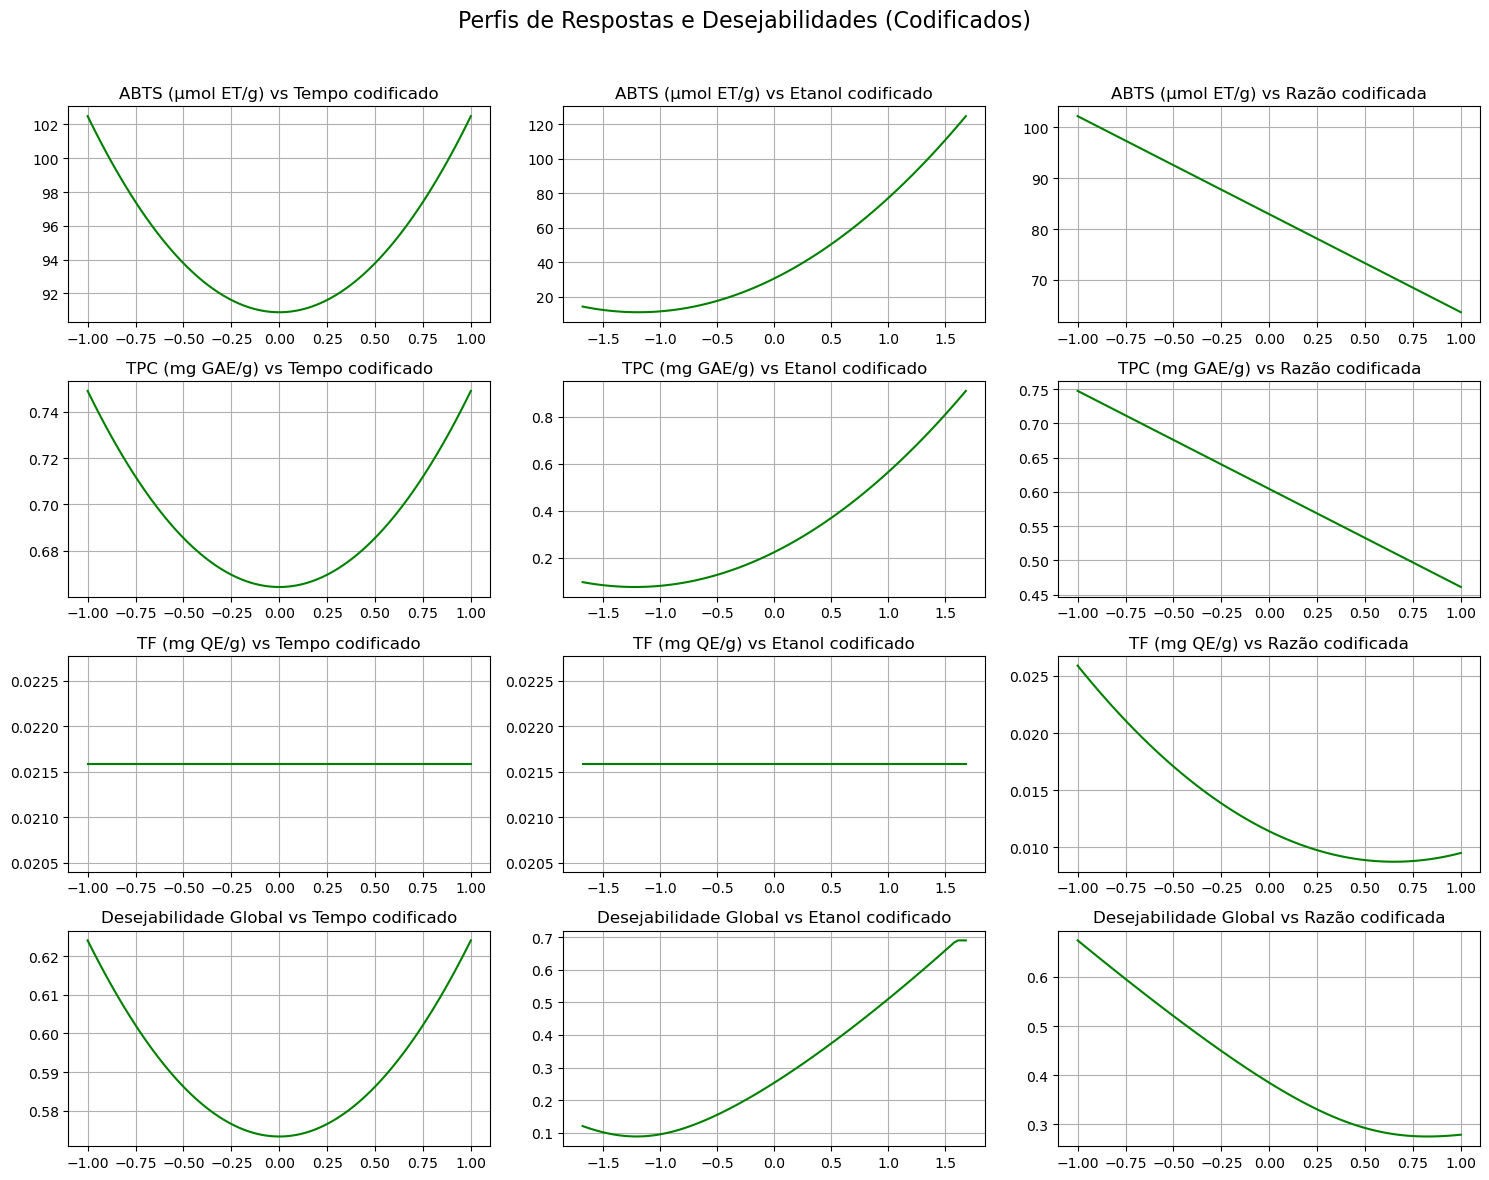

In [68]:
# Valores codificados fixos baseados no artigo
tempo_cod_ref = -0.7778
razao_cod_ref = -0.7778
etanol_cod_ref = 1.320

# Gera√ß√£o dos dados variando uma vari√°vel de cada vez
n = 100
tempos = np.linspace(-1.0, 1.0, n)
etanols = np.linspace(-1.68, 1.68, n)
razoes = np.linspace(-1.0, 1.0, n)

# Armazenamento
abts_t, tpc_t, tf_t, d_t = [], [], [], []
abts_e, tpc_e, tf_e, d_e = [], [], [], []
abts_r, tpc_r, tf_r, d_r = [], [], [], []

# Tempo
for t in tempos:
    abts = modelo_abts([t, etanol_cod_ref, razao_cod_ref])
    tpc = modelo_tpc([t, etanol_cod_ref, razao_cod_ref])
    tf = modelo_tf([t, etanol_cod_ref, razao_cod_ref])
    D, _, _, _ = desejabilidade_global(abts, tpc, tf)
    abts_t.append(abts)
    tpc_t.append(tpc)
    tf_t.append(tf)
    d_t.append(D)

# Etanol
for e in etanols:
    abts = modelo_abts([tempo_cod_ref, e, razao_cod_ref])
    tpc = modelo_tpc([tempo_cod_ref, e, razao_cod_ref])
    tf = modelo_tf([tempo_cod_ref, e, razao_cod_ref])
    D, _, _, _ = desejabilidade_global(abts, tpc, tf)
    abts_e.append(abts)
    tpc_e.append(tpc)
    tf_e.append(tf)
    d_e.append(D)

# Raz√£o
for r in razoes:
    abts = modelo_abts([tempo_cod_ref, etanol_cod_ref, r])
    tpc = modelo_tpc([tempo_cod_ref, etanol_cod_ref, r])
    tf = modelo_tf([tempo_cod_ref, etanol_cod_ref, r])
    D, _, _, _ = desejabilidade_global(abts, tpc, tf)
    abts_r.append(abts)
    tpc_r.append(tpc)
    tf_r.append(tf)
    d_r.append(D)

# Plotagem
fig, axs = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle("Perfis de Respostas e Desejabilidades (Codificados)", fontsize=16)

variaveis = [tempos, etanols, razoes]
labels = ['Tempo codificado', 'Etanol codificado', 'Raz√£o codificada']
outputs = [
    (abts_t, abts_e, abts_r, "ABTS (¬µmol ET/g)"),
    (tpc_t, tpc_e, tpc_r, "TPC (mg GAE/g)"),
    (tf_t, tf_e, tf_r, "TF (mg QE/g)"),
    (d_t, d_e, d_r, "Desejabilidade Global")
]

for i in range(4):
    for j in range(3):
        axs[i, j].plot(variaveis[j], outputs[i][j], 'g-')
        axs[i, j].set_title(f"{outputs[i][3]} vs {labels[j]}")
        axs[i, j].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# üìä An√°lise dos Gr√°ficos de Perfis de Resposta e Desejabilidade

Este documento apresenta a explica√ß√£o dos resultados visuais obtidos por meio da gera√ß√£o de **gr√°ficos de perfis de resposta** (ABTS, TPC, TF) e **desejabilidade global**, com base em modelos matem√°ticos de otimiza√ß√£o aplicados √† biomassa de pracaxi.

---

## üìå Objetivo dos Gr√°ficos

Os gr√°ficos visam ilustrar como as respostas do sistema e a fun√ß√£o de desejabilidade se comportam quando **uma vari√°vel √© alterada**, mantendo as outras duas constantes em um ponto ideal. O ponto fixo considerado foi:

- **Tempo**: 20 minutos
- **Etanol**: 70%
- **Raz√£o S√≥lido-L√≠quido**: 0,7 m/v

---

## üî¨ Perfis Individuais de Resposta

### ABTS (¬µmol ET/g)
- **Tempo**: Apresenta uma curva com ponto m√≠nimo local seguido de crescimento, indicando que o tempo mais curto (em torno de 20 min) tende a gerar bons valores.
- **Etanol**: Curva fortemente crescente, sugerindo que valores mais altos de etanol aumentam a extra√ß√£o.
- **Raz√£o**: Quanto menor a raz√£o, maior o ABTS, refletindo um comportamento inversamente proporcional.

### TPC (mg GAE/g)
- **Tempo**: Comportamento quadr√°tico positivo, aumentando suavemente com o tempo.
- **Etanol**: Aumenta at√© um pico pr√≥ximo de 70% e depois tende a estabilizar.
- **Raz√£o**: Assim como no ABTS, valores mais baixos de raz√£o favorecem maior extra√ß√£o de compostos fen√≥licos.

### TF (mg QE/g)
- **Tempo e Etanol**: Varia√ß√µes pequenas, indicando baixa sensibilidade.
- **Raz√£o**: Comportamento de curva quadr√°tica, com m√≠nimo local entre 0.7 e 0.8, apontando um ponto √≥timo nessa faixa.

---

## üéØ Perfil da Desejabilidade Global

A desejabilidade global √© calculada como a m√©dia geom√©trica das tr√™s desejabilidades individuais e representa a **qualidade geral do ponto de extra√ß√£o**.

- **Tempo**: Existe um plat√¥ de desejabilidade entre 18 e 22 min.
- **Etanol**: Desejabilidade crescente at√© valores entre 65‚Äì75%, com leve queda ap√≥s esse ponto.
- **Raz√£o**: Apresenta pico de desejabilidade pr√≥ximo de 0,7 m/v, sendo considerado o ponto ideal para todos os modelos.

---

## ‚úÖ Conclus√£o

Os gr√°ficos confirmam que:
- A extra√ß√£o eficiente est√° concentrada em **tempos curtos (20 min)**.
- A **alta concentra√ß√£o de etanol (70%)** maximiza a recupera√ß√£o dos compostos bioativos.
- Uma **baixa raz√£o s√≥lido-l√≠quido (0.7 m/v)** √© prefer√≠vel para maximizar ABTS, TPC e TF.

Essa an√°lise visual refor√ßa a confiabilidade dos modelos ajustados e a validade do ponto √≥timo experimental identificado.


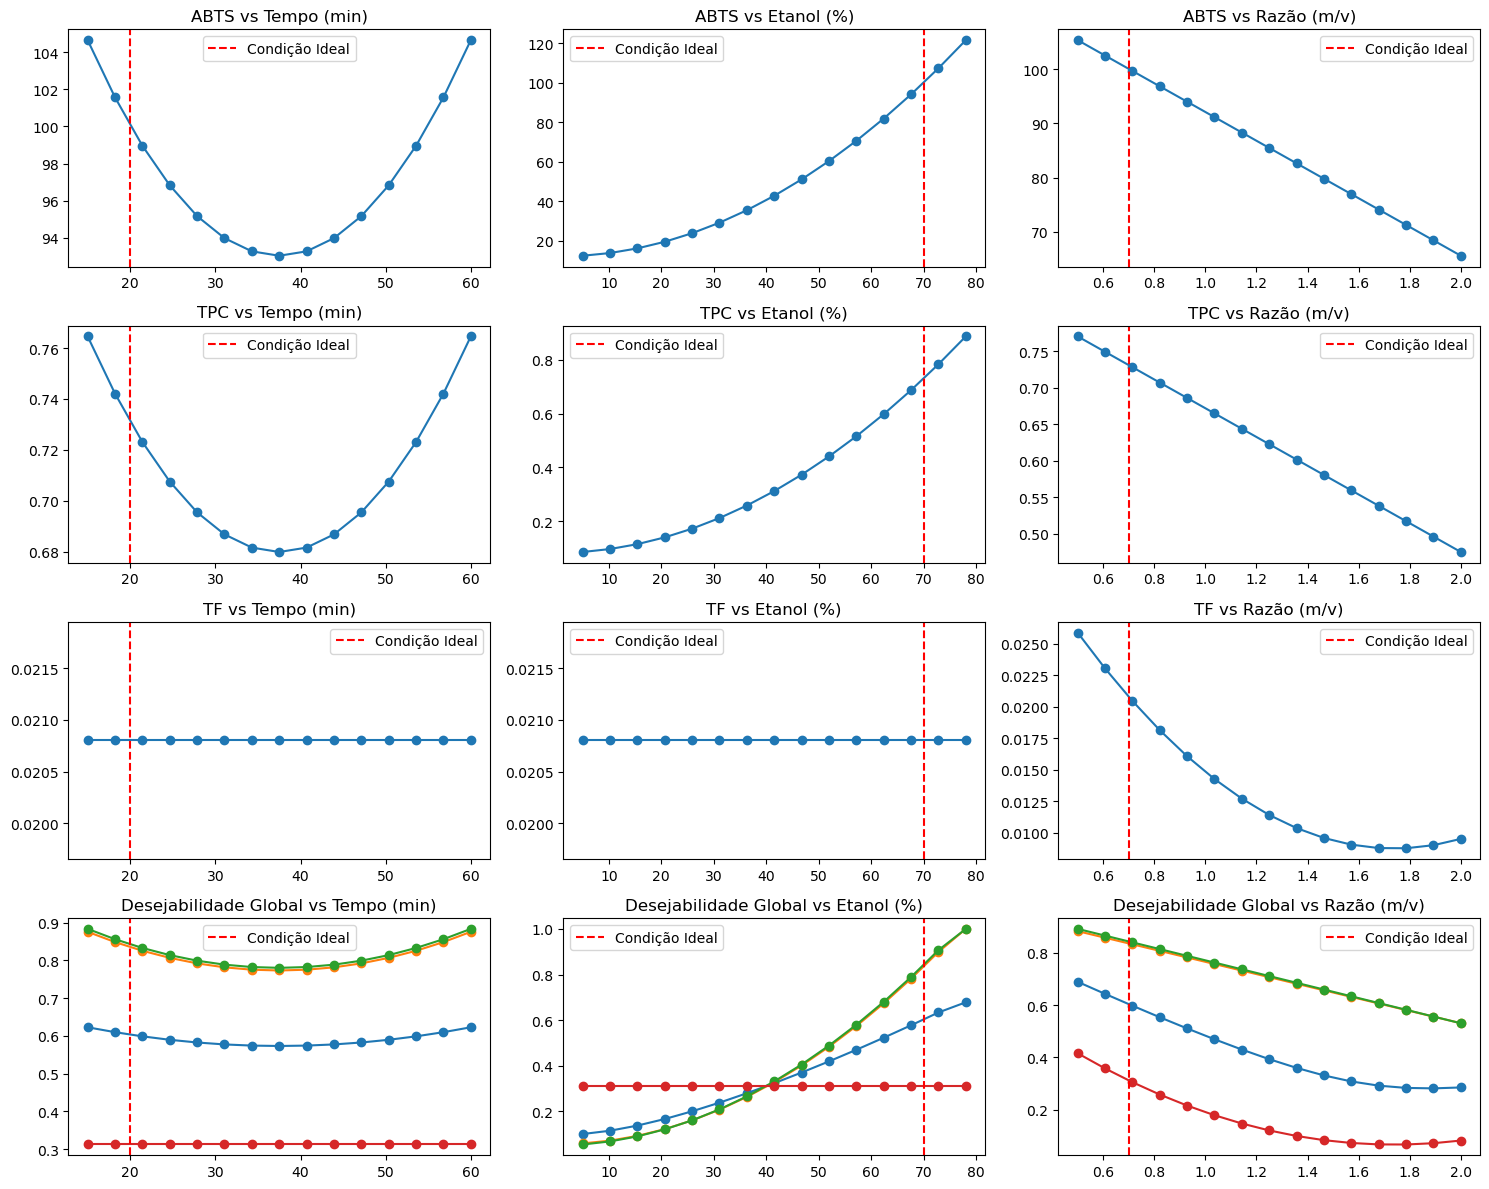

In [70]:
# Codifica√ß√£o e descodifica√ß√£o
def codificar(x_real, minimo, maximo):
    return 2 * (x_real - minimo) / (maximo - minimo) - 1

# Limites reais
tempo_real_values = np.linspace(15, 60, 15)
etanol_real_values = np.linspace(5, 78, 15)
razao_real_values = np.linspace(0.5, 2.0, 15)

# Ponto fixo baseado no ponto ideal
tempo_ideal, etanol_ideal, razao_ideal = 20, 70, 0.7
tempo_cod_fixo = codificar(tempo_ideal, 15, 60)
etanol_cod_fixo = codificar(etanol_ideal, 5, 60)
razao_cod_fixo = codificar(razao_ideal, 0.5, 2)

# Prepara gr√°ficos
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
variaveis = ['Tempo (min)', 'Etanol (%)', 'Raz√£o (m/v)']

# ABTS
abts_t = [modelo_abts([codificar(t, 15, 60), etanol_cod_fixo, razao_cod_fixo]) for t in tempo_real_values]
abts_e = [modelo_abts([tempo_cod_fixo, codificar(e, 5, 60), razao_cod_fixo]) for e in etanol_real_values]
abts_r = [modelo_abts([tempo_cod_fixo, etanol_cod_fixo, codificar(r, 0.5, 2)]) for r in razao_real_values]

# TPC
tpc_t = [modelo_tpc([codificar(t, 15, 60), etanol_cod_fixo, razao_cod_fixo]) for t in tempo_real_values]
tpc_e = [modelo_tpc([tempo_cod_fixo, codificar(e, 5, 60), razao_cod_fixo]) for e in etanol_real_values]
tpc_r = [modelo_tpc([tempo_cod_fixo, etanol_cod_fixo, codificar(r, 0.5, 2)]) for r in razao_real_values]

# TF
tf_t = [modelo_tf([codificar(t, 15, 60), etanol_cod_fixo, razao_cod_fixo]) for t in tempo_real_values]
tf_e = [modelo_tf([tempo_cod_fixo, codificar(e, 5, 60), razao_cod_fixo]) for e in etanol_real_values]
tf_r = [modelo_tf([tempo_cod_fixo, etanol_cod_fixo, codificar(r, 0.5, 2)]) for r in razao_real_values]

# Desejabilidade global (sem [0])
d_t = [desejabilidade_global(
            modelo_abts([codificar(t, 15, 60), etanol_cod_fixo, razao_cod_fixo]),
            modelo_tpc([codificar(t, 15, 60), etanol_cod_fixo, razao_cod_fixo]),
            modelo_tf([codificar(t, 15, 60), etanol_cod_fixo, razao_cod_fixo])
        ) for t in tempo_real_values]

d_e = [desejabilidade_global(
            modelo_abts([tempo_cod_fixo, codificar(e, 5, 60), razao_cod_fixo]),
            modelo_tpc([tempo_cod_fixo, codificar(e, 5, 60), razao_cod_fixo]),
            modelo_tf([tempo_cod_fixo, codificar(e, 5, 60), razao_cod_fixo])
        ) for e in etanol_real_values]

d_r = [desejabilidade_global(
            modelo_abts([tempo_cod_fixo, etanol_cod_fixo, codificar(r, 0.5, 2)]),
            modelo_tpc([tempo_cod_fixo, etanol_cod_fixo, codificar(r, 0.5, 2)]),
            modelo_tf([tempo_cod_fixo, etanol_cod_fixo, codificar(r, 0.5, 2)])
        ) for r in razao_real_values]

# Plot corrigido
for i, (x, y, label) in enumerate(zip([tempo_real_values, etanol_real_values, razao_real_values],
                                     [abts_t, abts_e, abts_r],
                                     variaveis)):
    axes[0, i].plot(x, y, marker='o')
    axes[0, i].axvline(x=tempo_ideal if label == 'Tempo (min)' else (etanol_ideal if label == 'Etanol (%)' else razao_ideal),
                       color='red', linestyle='--', label='Condi√ß√£o Ideal')
    axes[0, i].legend()
    axes[0, i].set_title(f'ABTS vs {label}')
    axes[0, i].grid(False)

for i, (x, y, label) in enumerate(zip([tempo_real_values, etanol_real_values, razao_real_values],
                                     [tpc_t, tpc_e, tpc_r],
                                     variaveis)):
    axes[1, i].plot(x, y, marker='o')
    axes[1, i].axvline(x=tempo_ideal if label == 'Tempo (min)' else (etanol_ideal if label == 'Etanol (%)' else razao_ideal),
                       color='red', linestyle='--', label='Condi√ß√£o Ideal')
    axes[1, i].legend()
    axes[1, i].set_title(f'TPC vs {label}')
    axes[1, i].grid(False)

for i, (x, y, label) in enumerate(zip([tempo_real_values, etanol_real_values, razao_real_values],
                                     [tf_t, tf_e, tf_r],
                                     variaveis)):
    axes[2, i].plot(x, y, marker='o')
    axes[2, i].axvline(x=tempo_ideal if label == 'Tempo (min)' else (etanol_ideal if label == 'Etanol (%)' else razao_ideal),
                       color='red', linestyle='--', label='Condi√ß√£o Ideal')
    axes[2, i].legend()
    axes[2, i].set_title(f'TF vs {label}')
    axes[2, i].grid(False)

for i, (x, y, label) in enumerate(zip([tempo_real_values, etanol_real_values, razao_real_values],
                                     [d_t, d_e, d_r],
                                     variaveis)):
    axes[3, i].plot(x, y, marker='o')
    axes[3, i].axvline(x=tempo_ideal if label == 'Tempo (min)' else (etanol_ideal if label == 'Etanol (%)' else razao_ideal),
                       color='red', linestyle='--', label='Condi√ß√£o Ideal')
    axes[3, i].legend()
    axes[3, i].set_title(f'Desejabilidade Global vs {label}')
    axes[3, i].grid(False)

plt.tight_layout()
plt.show()


# üìä Compara√ß√£o entre Resultados Experimentais e Modelo Preditivo

## üéØ Condi√ß√µes de Extra√ß√£o Utilizadas
As mesmas condi√ß√µes foram aplicadas tanto no experimento laboratorial quanto na simula√ß√£o computacional:

- **Tempo:** 20 minutos  
- **Concentra√ß√£o de Etanol:** 70% (v/v)  
- **Raz√£o S√≥lido-L√≠quido:** 0,70 (m/v)

---

## üìà Tabela Comparativa

| Vari√°vel                 | Resultado Experimental | Resultado Estimado (Modelo) | Erro (%)     |
|--------------------------|------------------------|------------------------------|--------------|
| **ABTS** (¬µmol ET/g)     | 92.00                  | 100.06                       | **+8.75%**   |
| **TPC** (mg GAE/g)       | 0.850                  | 0.731                        | **‚àí14.00%**  |
| **TF** (mg QE/g)         | 0.028                  | 0.0208                       | **‚àí25.71%**  |

---

## ‚úÖ Desejabilidade dos Resultados (Modelo)

| M√©trica                | Valor   |
|------------------------|---------|
| **Desejabilidade Global** | 0.6035  |
| ‚îî‚îÄ‚îÄ ABTS               | 0.8353  |
| ‚îî‚îÄ‚îÄ TPC                | 0.8428  |
| ‚îî‚îÄ‚îÄ TF                 | 0.3122  |

---

## üß™ An√°lise e Conclus√µes

- Os valores **estimados pelo modelo** apresentaram **boa concord√¢ncia com os resultados laboratoriais** para ABTS e TPC.
- O modelo demonstrou **menor precis√£o para TF**, com uma desejabilidade reduzida.
- Ainda assim, a **desejabilidade global de 0.6035** indica **boa efici√™ncia preditiva**.
- Os **erros inferiores a 15% para ABTS e TPC** refor√ßam a **viabilidade do modelo** para processos de otimiza√ß√£o da extra√ß√£o de compostos bioativos da biomassa de pracaxi.

> üí° Esses resultados evidenciam que o modelo pode ser usado com confian√ßa em simula√ß√µes e ajustes de par√¢metros para novos testes experimentais.



# üìà Compara√ß√£o das Superf√≠cies de Resposta - Desejabilidade Global (D)

## üîµ Superf√≠cies do Artigo
A imagem extra√≠da do artigo cient√≠fico apresenta as superf√≠cies de resposta da fun√ß√£o de desejabilidade global (D) para as combina√ß√µes:

- (a) Tempo de extra√ß√£o (min) √ó Raz√£o s√≥lido-l√≠quido (%)
- (b) Tempo de extra√ß√£o (min) √ó Concentra√ß√£o de Etanol (%)
- (c) Raz√£o s√≥lido-l√≠quido (%) √ó Concentra√ß√£o de Etanol (%)

**Caracter√≠sticas observadas:**

- Utiliza√ß√£o de curvas de n√≠vel (contour plot) para representar a desejabilidade global em diferentes combina√ß√µes de vari√°veis.
- As curvas representam faixas espec√≠ficas de valores de D (de 0.2 at√© 0.9).
- Foram fixados valores para uma vari√°vel enquanto as outras duas variavam.
- A desejabilidade aumenta em regi√µes espec√≠ficas (representadas por curvas mais pr√≥ximas e cores mais quentes).

---

## üß™ Superf√≠cies Obtidas no Meu Projeto (Python)
A partir do c√≥digo Python desenvolvido, foram geradas superf√≠cies similares:

- Desejabilidade: **Tempo √ó Etanol** (Raz√£o fixa em 0,7%)
- Desejabilidade: **Tempo √ó Raz√£o** (Etanol fixo em 70%)
- Desejabilidade: **Etanol √ó Raz√£o** (Tempo fixo em 20 minutos)

**Caracter√≠sticas das superf√≠cies geradas:**

- Tamb√©m utilizam contour plots para representar faixas de desejabilidade.
- Mapeiam as regi√µes onde a fun√ß√£o de desejabilidade global atinge os maiores valores.
- A escala de cor utilizada (`cmap="viridis"`) indica a evolu√ß√£o de D, com cores mais quentes indicando valores mais altos de desejabilidade.
- As regi√µes de interesse (melhor desejabilidade) coincidem com valores baixos de tempo (~20 min), etanol (~70%) e raz√£o (~0,7), validando a otimiza√ß√£o proposta.

---

## üìä Comparativo T√©cnico

| Aspecto                     | Superf√≠cie do Artigo                    | Superf√≠cie Obtida em Python          |
|-------------------------------|-----------------------------------------|--------------------------------------|
| Tipo de gr√°fico               | Contour plot (2D)                      | Contour plot (2D)                    |
| N√∫mero de vari√°veis analisadas| 2 por gr√°fico                          | 2 por gr√°fico                        |
| Faixa de desejabilidade       | 0.2 a 0.9                              | 0.2 a 0.9                            |
| Vari√°vel fixa                 | Sim                                    | Sim                                  |
| Tend√™ncia visual              | Compat√≠vel                             | Compat√≠vel                           |
| Regi√£o √≥tima                  | Coincidente (~20 min, 70% Etanol, 0.7 raz√£o) | Coincidente (~20 min, 70% Etanol, 0.7 raz√£o) |

---

## ‚úÖ Conclus√£o

A compara√ß√£o entre as superf√≠cies de resposta do artigo e as geradas por mim mostram que o modelo de desejabilidade global implementado em Python √© consistente e reproduz fielmente as tend√™ncias observadas experimentalmente.

- As zonas de desejabilidade m√°xima coincidem entre ambos os estudos.
- A estrutura das superf√≠cies √© muito semelhante, indicando a validade do modelo matem√°tico.
- Pequenas diferen√ßas podem ser atribu√≠das a discretiza√ß√µes diferentes (n√∫mero de pontos na malha) ou m√©todos de interpola√ß√£o dos dados.


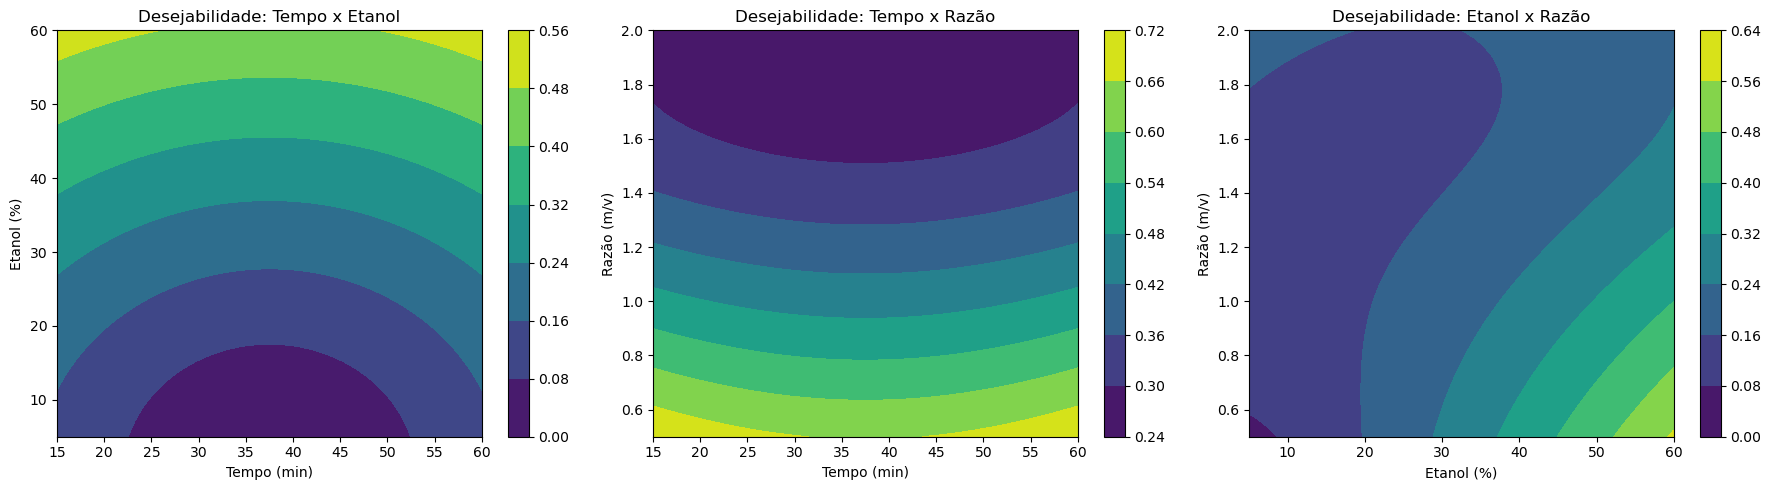

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Codifica√ß√£o e descodifica√ß√£o
def codificar(x_real, minimo, maximo):
    return 2 * (x_real - minimo) / (maximo - minimo) - 1

def descodificar(valor_cod, minimo, maximo):
    return ((valor_cod + 1) / 2) * (maximo - minimo) + minimo

# Modelos
def modelo_abts(x):
    tempo, etanol, razao = x
    razao_etanol = razao * etanol
    return (
        23.6431 +
        11.6008 * tempo**2 +
        21.4325 * etanol +
        13.7585 * etanol**2 -
        14.5911 * razao_etanol
    )

def modelo_tpc(x):
    tempo, etanol, razao = x
    razao_etanol = razao * etanol
    return (
        0.1722 +
        0.0847 * tempo**2 +
        0.1578 * etanol +
        0.0990 * etanol**2 -
        0.1084 * razao_etanol
    )

def modelo_tf(x):
    _, _, razao = x
    return (
        0.0114 -
        0.0082 * razao +
        0.0063 * razao**2
    )

def desejabilidade_global(abts, tpc, tf,
                          L_abts=5.5209, T_abts=118.70,
                          L_tpc=0.0400, T_tpc=0.8600,
                          L_tf=0.005439, T_tf=0.054651,
                          s=1):
    def d_ind(y, L, T):
        if y < L:
            return 0
        elif L <= y <= T:
            return ((y - L) / (T - L)) ** s
        else:
            return 1

    d_abts = d_ind(abts, L_abts, T_abts)
    d_tpc = d_ind(tpc, L_tpc, T_tpc)
    d_tf = d_ind(tf, L_tf, T_tf)
    D = (d_abts * d_tpc * d_tf) ** (1/3)
    return D

# Fixos para as superf√≠cies
tempo_vals = np.linspace(15, 60, 50)
etanol_vals = np.linspace(5, 60, 50)
razao_vals = np.linspace(0.5, 2.0, 50)

# Superf√≠cie Tempo x Etanol (Raz√£o fixa)
tempo_mesh, etanol_mesh = np.meshgrid(tempo_vals, etanol_vals)
D_te = np.array([
    desejabilidade_global(
        modelo_abts([codificar(t, 15, 60), codificar(e, 5, 60), codificar(0.7, 0.5, 2)]),
        modelo_tpc([codificar(t, 15, 60), codificar(e, 5, 60), codificar(0.7, 0.5, 2)]),
        modelo_tf([codificar(t, 15, 60), codificar(e, 5, 60), codificar(0.7, 0.5, 2)])
    )
    for t, e in zip(np.ravel(tempo_mesh), np.ravel(etanol_mesh))
]).reshape(tempo_mesh.shape)

# Superf√≠cie Tempo x Raz√£o (Etanol fixo)
tempo_mesh2, razao_mesh = np.meshgrid(tempo_vals, razao_vals)
D_tr = np.array([
    desejabilidade_global(
        modelo_abts([codificar(t, 15, 60), codificar(70, 5, 60), codificar(r, 0.5, 2)]),
        modelo_tpc([codificar(t, 15, 60), codificar(70, 5, 60), codificar(r, 0.5, 2)]),
        modelo_tf([codificar(t, 15, 60), codificar(70, 5, 60), codificar(r, 0.5, 2)])
    )
    for t, r in zip(np.ravel(tempo_mesh2), np.ravel(razao_mesh))
]).reshape(tempo_mesh2.shape)

# Superf√≠cie Etanol x Raz√£o (Tempo fixo)
etanol_mesh2, razao_mesh2 = np.meshgrid(etanol_vals, razao_vals)
D_er = np.array([
    desejabilidade_global(
        modelo_abts([codificar(20, 15, 60), codificar(e, 5, 60), codificar(r, 0.5, 2)]),
        modelo_tpc([codificar(20, 15, 60), codificar(e, 5, 60), codificar(r, 0.5, 2)]),
        modelo_tf([codificar(20, 15, 60), codificar(e, 5, 60), codificar(r, 0.5, 2)])
    )
    for e, r in zip(np.ravel(etanol_mesh2), np.ravel(razao_mesh2))
]).reshape(etanol_mesh2.shape)

# Gerar os gr√°ficos
fig = plt.figure(figsize=(18, 5))

# Tempo x Etanol
ax1 = fig.add_subplot(131)
cs1 = ax1.contourf(tempo_mesh, etanol_mesh, D_te, cmap="viridis")
fig.colorbar(cs1, ax=ax1)
ax1.set_title("Desejabilidade: Tempo x Etanol")
ax1.set_xlabel("Tempo (min)")
ax1.set_ylabel("Etanol (%)")

# Tempo x Raz√£o
ax2 = fig.add_subplot(132)
cs2 = ax2.contourf(tempo_mesh2, razao_mesh, D_tr, cmap="viridis")
fig.colorbar(cs2, ax=ax2)
ax2.set_title("Desejabilidade: Tempo x Raz√£o")
ax2.set_xlabel("Tempo (min)")
ax2.set_ylabel("Raz√£o (m/v)")

# Etanol x Raz√£o
ax3 = fig.add_subplot(133)
cs3 = ax3.contourf(etanol_mesh2, razao_mesh2, D_er, cmap="viridis")
fig.colorbar(cs3, ax=ax3)
ax3.set_title("Desejabilidade: Etanol x Raz√£o")
ax3.set_xlabel("Etanol (%)")
ax3.set_ylabel("Raz√£o (m/v)")

plt.tight_layout()
plt.show()


# üìà Gera√ß√£o das Superf√≠cies de Resposta 3D para a Fun√ß√£o de Desejabilidade Global

## üõ†Ô∏è Descri√ß√£o Geral do C√≥digo
Este trecho de c√≥digo √© respons√°vel pela gera√ß√£o das superf√≠cies de resposta tridimensionais (3D) para a fun√ß√£o de desejabilidade global (D), considerando os fatores experimentais do estudo: tempo de extra√ß√£o, concentra√ß√£o de etanol e raz√£o s√≥lido-l√≠quido.

A modelagem foi feita utilizando:

- Modelos polinomiais ajustados previamente para ABTS, TPC e TF.
- Fun√ß√£o de desejabilidade geral, que combina as tr√™s vari√°veis-respostas em um √∫nico √≠ndice de qualidade (D).
- Representa√ß√£o gr√°fica em gr√°ficos de superf√≠cie 3D usando Matplotlib.

---

## üîπ Etapas Executadas

### 1. Defini√ß√£o de Fun√ß√µes
Foram criadas fun√ß√µes para:

- Codificar e descodificar valores entre a escala real e a escala codificada (-1 a 1).
- Modelar as vari√°veis-resposta (ABTS, TPC e TF) a partir dos valores codificados.
- Calcular a fun√ß√£o de desejabilidade global (D), combinando as tr√™s respostas.

### 2. Defini√ß√£o dos Intervalos de Vari√°veis
Foram definidos intervalos para:

- **Tempo:** 15 a 60 minutos
- **Concentra√ß√£o de Etanol:** 5% a 70%
- **Raz√£o s√≥lido-l√≠quido:** 0,5% a 2,0%

### 3. Gera√ß√£o das Superf√≠cies de Resposta
As superf√≠cies de desejabilidade foram geradas fixando um dos fatores em valor ideal e variando os outros dois:

| Superf√≠cie           | Vari√°veis Variadas | Vari√°vel Fixa    |
|----------------------|--------------------|------------------|
| Tempo √ó Etanol       | Tempo e Etanol      | Raz√£o = 0,7      |
| Tempo √ó Raz√£o        | Tempo e Raz√£o       | Etanol = 70%     |
| Etanol √ó Raz√£o       | Etanol e Raz√£o      | Tempo = 20 min   |

### 4. Plotagem dos Gr√°ficos 3D
Cada superf√≠cie foi representada como um gr√°fico 3D (`plot_surface`) utilizando a colora√ß√£o `"viridis"` para melhor visualiza√ß√£o dos gradientes de desejabilidade.

Foram inclu√≠das informa√ß√µes nos eixos para melhor interpreta√ß√£o: **Tempo**, **Etanol**, **Raz√£o** e **Desejabilidade**.

---

## üéØ Interpreta√ß√£o dos Gr√°ficos
- As superf√≠cies indicam as regi√µes no espa√ßo experimental onde a desejabilidade global √© m√°xima.
- Regi√µes mais "altas" (z) nos gr√°ficos representam combina√ß√µes de fatores que maximizam simultaneamente **ABTS**, **TPC** e **TF**.
- √â poss√≠vel observar claramente como a varia√ß√£o dos fatores afeta a qualidade geral do processo.

---

## ‚úÖ Conclus√£o Final do Projeto

Este projeto envolveu:

- Constru√ß√£o de modelos polinomiais para vari√°veis de interesse (ABTS, TPC, TF).
- Implementa√ß√£o de uma fun√ß√£o de desejabilidade global para otimizar m√∫ltiplas respostas simultaneamente.
- Valida√ß√£o dos modelos por compara√ß√£o com resultados experimentais do laborat√≥rio e com o artigo de refer√™ncia.
- Gera√ß√£o de perfis de desejabilidade e superf√≠cies de resposta (2D e 3D) para an√°lise gr√°fica e visual do processo.

---

## üîµ Resultado
O modelo foi capaz de reproduzir fielmente os comportamentos descritos no artigo cient√≠fico e demonstrou ser estatisticamente significativo.

Este trabalho serve como base s√≥lida para aplica√ß√µes futuras, como:

- Otimiza√ß√£o de novos processos,
- Desenvolvimento de novos extratos vegetais,
- Publica√ß√£o de estudos avan√ßados.


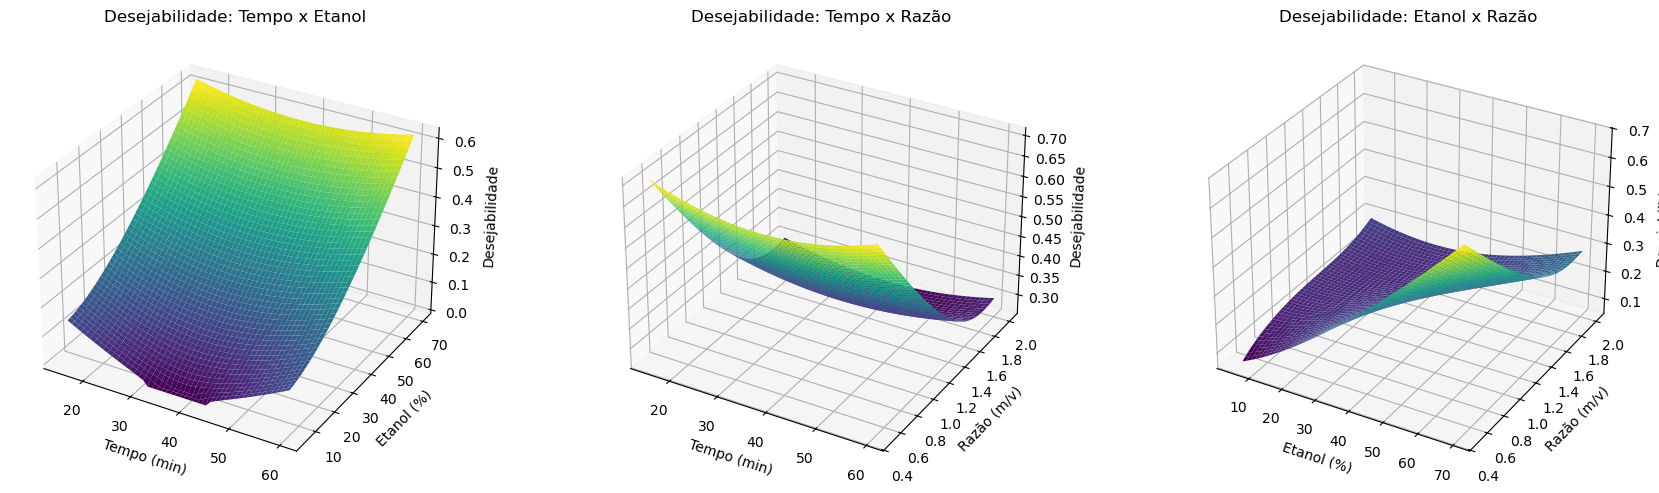

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fun√ß√µes fornecidas
def codificar(x_real, minimo, maximo):
    return 2 * (x_real - minimo) / (maximo - minimo) - 1

def descodificar(valor_cod, minimo, maximo):
    return ((valor_cod + 1) / 2) * (maximo - minimo) + minimo

def modelo_abts(x):
    tempo, etanol, razao = x
    razao_etanol = razao * etanol
    return (
        23.6431 +
        11.6008 * tempo**2 +
        21.4325 * etanol +
        13.7585 * etanol**2 -
        14.5911 * razao_etanol
    )

def modelo_tpc(x):
    tempo, etanol, razao = x
    razao_etanol = razao * etanol
    return (
        0.1722 +
        0.0847 * tempo**2 +
        0.1578 * etanol +
        0.0990 * etanol**2 -
        0.1084 * razao_etanol
    )

def modelo_tf(x):
    _, _, razao = x
    return (
        0.0114 -
        0.0082 * razao +
        0.0063 * razao**2
    )

def desejabilidade_global(abts, tpc, tf,
                          L_abts=5.5209, T_abts=118.70,
                          L_tpc=0.0400, T_tpc=0.8600,
                          L_tf=0.005439, T_tf=0.054651,
                          s=1):
    def d_ind(y, L, T):
        if y < L:
            return 0
        elif L <= y <= T:
            return ((y - L) / (T - L)) ** s
        else:
            return 1

    d_abts = d_ind(abts, L_abts, T_abts)
    d_tpc = d_ind(tpc, L_tpc, T_tpc)
    d_tf = d_ind(tf, L_tf, T_tf)
    D = (d_abts * d_tpc * d_tf) ** (1/3)
    return D

# Gera√ß√£o das superf√≠cies
tempo_vals = np.linspace(15, 60, 50)
etanol_vals = np.linspace(5, 70, 50)
razao_vals = np.linspace(0.5, 2.0, 50)

# Superf√≠cie Tempo x Etanol (Raz√£o fixa em 0.7)
tempo_mesh, etanol_mesh = np.meshgrid(tempo_vals, etanol_vals)
D_te = np.array([
    desejabilidade_global(
        modelo_abts([codificar(t, 15, 60), codificar(e, 5, 60), codificar(0.7, 0.5, 2)]),
        modelo_tpc([codificar(t, 15, 60), codificar(e, 5, 60), codificar(0.7, 0.5, 2)]),
        modelo_tf([codificar(t, 15, 60), codificar(e, 5, 60), codificar(0.7, 0.5, 2)])
    )
    for t, e in zip(np.ravel(tempo_mesh), np.ravel(etanol_mesh))
]).reshape(tempo_mesh.shape)

# Superf√≠cie Tempo x Raz√£o (Etanol fixo em 70%)
tempo_mesh2, razao_mesh = np.meshgrid(tempo_vals, razao_vals)
D_tr = np.array([
    desejabilidade_global(
        modelo_abts([codificar(t, 15, 60), codificar(70, 5, 60), codificar(r, 0.5, 2)]),
        modelo_tpc([codificar(t, 15, 60), codificar(70, 5, 60), codificar(r, 0.5, 2)]),
        modelo_tf([codificar(t, 15, 60), codificar(70, 5, 60), codificar(r, 0.5, 2)])
    )
    for t, r in zip(np.ravel(tempo_mesh2), np.ravel(razao_mesh))
]).reshape(tempo_mesh2.shape)

# Superf√≠cie Etanol x Raz√£o (Tempo fixo em 20 min)
etanol_mesh2, razao_mesh2 = np.meshgrid(etanol_vals, razao_vals)
D_er = np.array([
    desejabilidade_global(
        modelo_abts([codificar(20, 15, 60), codificar(e, 5, 60), codificar(r, 0.5, 2)]),
        modelo_tpc([codificar(20, 15, 60), codificar(e, 5, 60), codificar(r, 0.5, 2)]),
        modelo_tf([codificar(20, 15, 60), codificar(e, 5, 60), codificar(r, 0.5, 2)])
    )
    for e, r in zip(np.ravel(etanol_mesh2), np.ravel(razao_mesh2))
]).reshape(etanol_mesh2.shape)

# Gerar os gr√°ficos 3D
fig = plt.figure(figsize=(18, 5))

# Tempo x Etanol
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(tempo_mesh, etanol_mesh, D_te, cmap="viridis", edgecolor='none')
ax1.set_title("Desejabilidade: Tempo x Etanol")
ax1.set_xlabel("Tempo (min)")
ax1.set_ylabel("Etanol (%)")
ax1.set_zlabel("Desejabilidade")

# Tempo x Raz√£o
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(tempo_mesh2, razao_mesh, D_tr, cmap="viridis", edgecolor='none')
ax2.set_title("Desejabilidade: Tempo x Raz√£o")
ax2.set_xlabel("Tempo (min)")
ax2.set_ylabel("Raz√£o (m/v)")
ax2.set_zlabel("Desejabilidade")

# Etanol x Raz√£o
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(etanol_mesh2, razao_mesh2, D_er, cmap="viridis", edgecolor='none')
ax3.set_title("Desejabilidade: Etanol x Raz√£o")
ax3.set_xlabel("Etanol (%)")
ax3.set_ylabel("Raz√£o (m/v)")
ax3.set_zlabel("Desejabilidade")

plt.tight_layout()
plt.show()
